<a href="https://colab.research.google.com/github/Ayona123/Drug_repurposing/blob/main/8702_TEST_2101-2150.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [935]:
# Install RDKit.
%%capture
!pip install rdkit-pypi

In [936]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
import numpy as np

RDKit ERROR: [17:59:29] SMILES Parse Error: extra open parentheses for input: 'Cl.Cl/C(=C
RDKit ERROR: 1cncn1)c1ccc(Cl)cc1Cl'


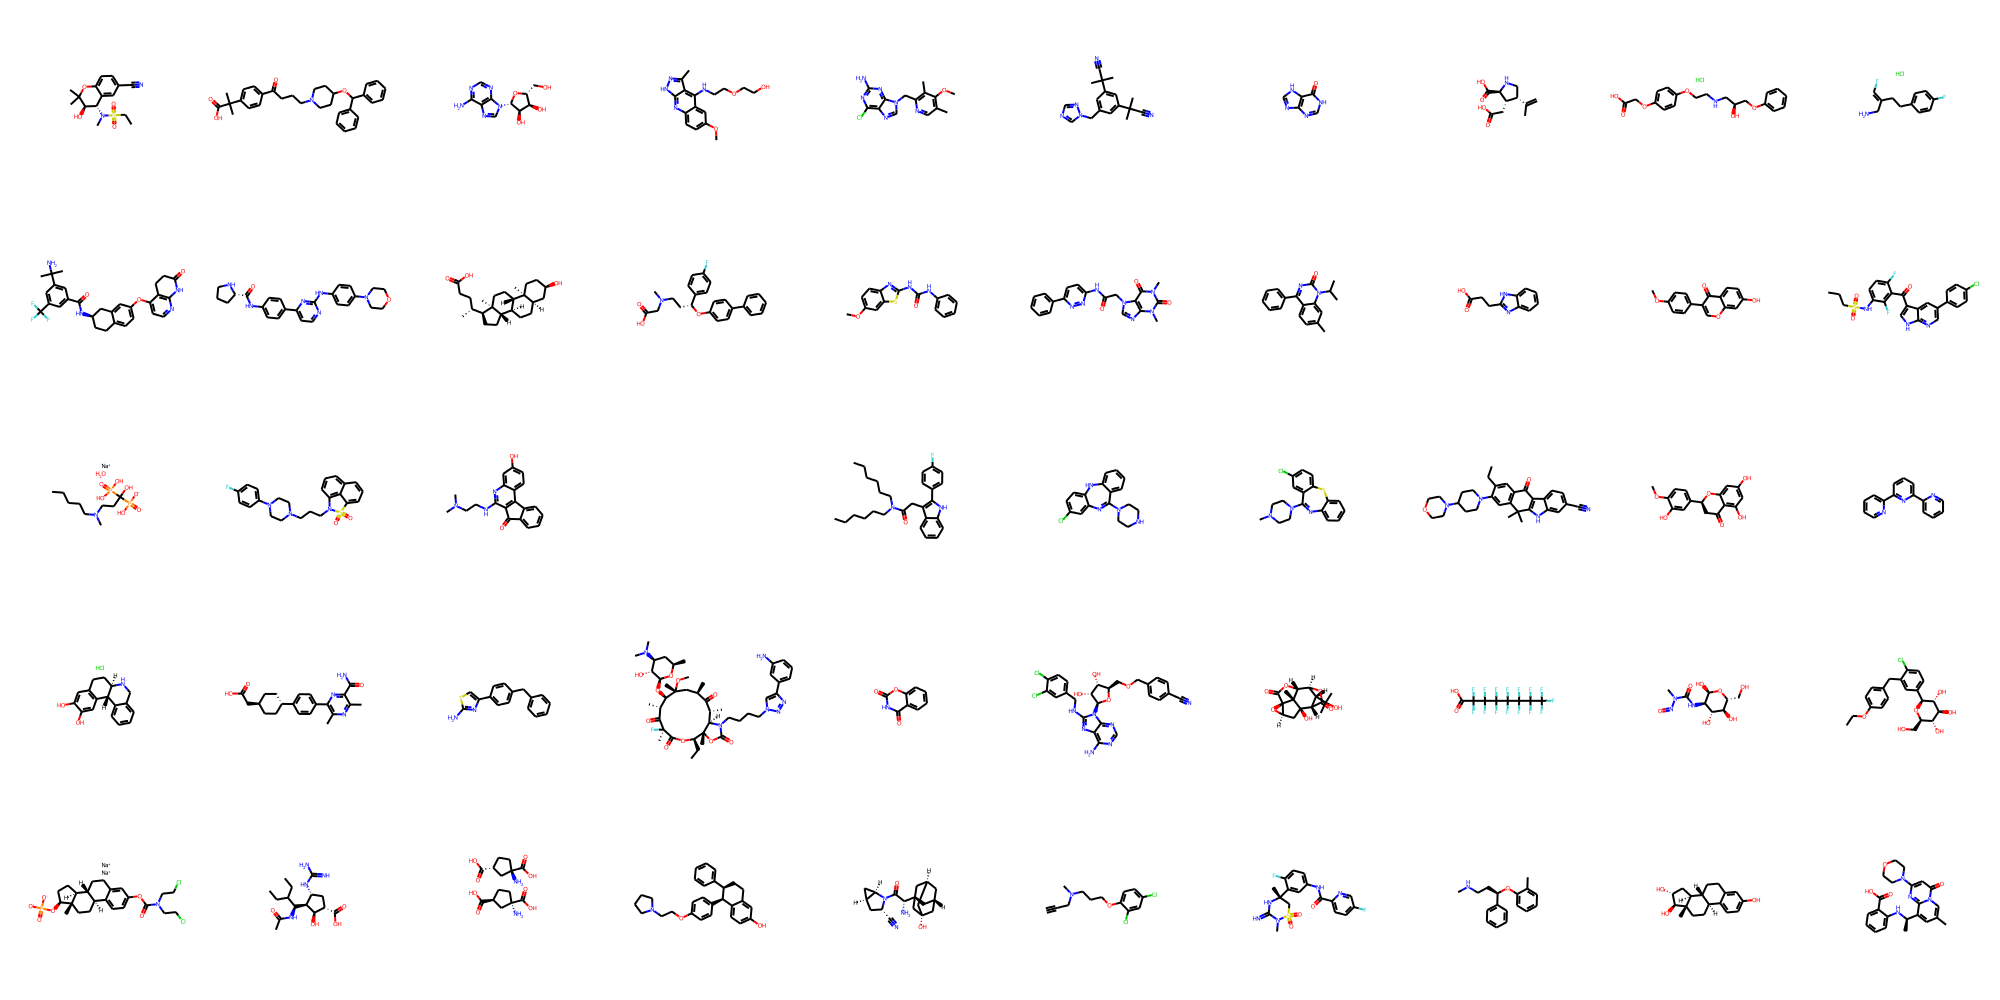

In [937]:
smiles_list = [

'CCS(=O)(=O)N(C)[C@H]1c2cc(C#N)ccc2OC(C)(C)[C@@H]1O',
'CC(C)(C(=O)O)c1ccc(C(=O)CCCN2CCC(OC(c3ccccc3)c3ccccc3)CC2)cc1',
'Nc1ncnc2c1ncn2[C@@H]1O[C@H](CO)[C@@H](O)[C@H]1O',
'COc1ccc2nc3[nH]nc(C)c3c(NCCOCCO)c2c1',
'COc1c(C)cnc(Cn2cnc3c(Cl)nc(N)nc32)c1C',
'CC(C)(C#N)c1cc(Cn2cncn2)cc(C(C)(C)C#N)c1',
'O=c1[nH]cnc2nc[nH]c12',
'C=C(C)[C@H]1CN[C@H](C(=O)O)[C@H]1CC(=O)O',
'Cl.O=C(O)COc1ccc(OCCNC[C@H](O)COc2ccccc2)cc1',
'Cl.NC/C(=C/F)CCc1ccc(F)cc1',
'CC(C)(N)c1cc(C(=O)N[C@@H]2CCc3ccc(Oc4ccnc5c4CCC(=O)N5)cc3C2)cc(C(F)(F)F)c1',
'O=C(Nc1ccc(-c2ccnc(Nc3ccc(N4CCOCC4)cc3)n2)cc1)[C@@H]1CCCN1',
'C[C@H](CCC(=O)O)[C@@H]1CC[C@H]2[C@@H]3CC[C@@H]4C[C@H](O)CC[C@]4(C)[C@H]3CC[C@]12C',
'CN(CC[C@@H](Oc1ccc(-c2ccccc2)cc1)c1ccc(F)cc1)CC(=O)O',
'COc1ccc2nc(NC(=O)Nc3ccccc3)sc2c1',
'Cn1c(=O)c2c(ncn2CC(=O)Nc2ccc(-c3ccccc3)nn2)n(C)c1=O',
'Cc1ccc2c(-c3ccccc3)nc(=O)n(C(C)C)c2c1',
'O=C(O)CCc1nc2ccccc2[nH]1',
'COc1ccc(-c2coc3cc(O)ccc3c2=O)cc1',
'CCCS(=O)(=O)Nc1ccc(F)c(C(=O)c2c[nH]c3ncc(-c4ccc(Cl)cc4)cc23)c1F',
'CCCCCN(C)CCC(O)(P(=O)([O-])O)P(=O)(O)O.O.[Na+]',
'O=S1(=O)c2cccc3cccc(c23)N1CCCN1CCN(c2ccc(F)cc2)CC1',
'CN(C)CCNc1nc2cc(O)ccc2c2c1C(=O)c1ccccc1-2',
'Cl.Cl/C(=C\n1cncn1)c1ccc(Cl)cc1Cl',
'CCCCCCN(CCCCCC)C(=O)Cc1c(-c2ccc(F)cc2)[nH]c2ccccc12',
'Clc1ccc2c(c1)N=C(N1CCNCC1)c1ccccc1N2',
'CN1CCN(C2=Nc3ccccc3Sc3ccc(Cl)cc32)CC1',
'CCc1cc2c(cc1N1CCC(N3CCOCC3)CC1)C(C)(C)c1[nH]c3cc(C#N)ccc3c1C2=O',
'COc1ccc([C@@H]2CC(=O)c3c(O)cc(O)cc3O2)cc1O',
'c1ccc(-c2cccc(-c3ccccn3)n2)nc1',
'Cl.Oc1cc2c(cc1O)[C@H]1c3ccccc3CN[C@@H]1CC2',
'Cc1nc(C)c(-c2ccc([C@H]3CC[C@H](CC(=O)O)CC3)cc2)nc1C(N)=O',
'Nc1nc(-c2ccc(Cc3ccccc3)cc2)cs1',
'CC[C@H]1OC(=O)[C@@](C)(F)C(=O)[C@H](C)[C@@H](O[C@@H]2O[C@H](C)C[C@H](N(C)C)[C@H]2O)[C@](C)(OC)C[C@@H](C)C(=O)[C@H](C)[C@H]2N(CCCCn3cc(-c4cccc(N)c4)nn3)C(=O)O[C@]12C',
'O=c1[nH]c(=O)c2ccccc2o1',
'N#Cc1ccc(COC[C@H]2O[C@@H](n3c(NCc4ccc(Cl)c(Cl)c4)nc4c(N)ncnc43)[C@H](O)[C@@H]2O)cc1',
'CC(C)(O)[C@H]1[C@@H]2OC(=O)[C@@H]1[C@]1(O)C[C@H]3O[C@]34C(=O)O[C@H]2[C@@]41C',
'O=C(O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F',
'CN(N=O)C(=O)N[C@H]1[C@@H](O)O[C@H](CO)[C@@H](O)[C@@H]1O',
'CCOc1ccc(Cc2cc([C@@H]3O[C@H](CO)[C@@H](O)[C@H](O)[C@H]3O)ccc2Cl)cc1',
'C[C@]12CC[C@@H]3c4ccc(OC(=O)N(CCCl)CCCl)cc4CC[C@H]3[C@@H]1CC[C@@H]2OP(=O)([O-])[O-].[Na+].[Na+]',
'CCC(CC)[C@H](NC(C)=O)[C@@H]1[C@H](O)[C@@H](C(=O)O)C[C@H]1NC(=N)N',
'N[C@@]1(C(=O)O)CC[C@H](C(=O)O)C1.N[C@]1(C(=O)O)CC[C@@H](C(=O)O)C1',
'Oc1ccc2c(c1)CC[C@H](c1ccccc1)[C@@H]2c1ccc(OCCN2CCCC2)cc1',
'N#C[C@@H]1C[C@H]2C[C@H]2N1C(=O)[C@@H](N)[C@@]12C[C@@H]3C[C@@H](C[C@@](O)(C3)C1)C2',
'C#CCN(C)CCCOc1ccc(Cl)cc1Cl',
'CN1C(=N)N[C@](C)(c2cc(NC(=O)c3ccc(F)cn3)ccc2F)CS1(=O)=O',
'CNCC[C@@H](Oc1ccccc1C)c1ccccc1',
'C[C@]12CC[C@@H]3c4ccc(O)cc4CC[C@H]3[C@@H]1C[C@@H](O)[C@@H]2O',
'Cc1cc([C@@H](C)Nc2ccccc2C(=O)O)c2nc(N3CCOCC3)cc(=O)n2c1',

               
]
mol_list = []
for smiles in smiles_list:
   mol= Chem.MolFromSmiles (smiles)
   mol_list.append (mol)

img = Draw.MolsToGridImage(mol_list, molsPerRow=10)
img



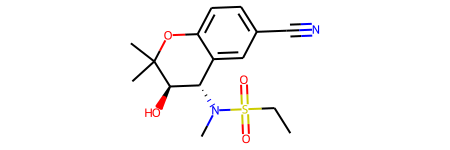

In [938]:
M1 = mol_list [0]
M1

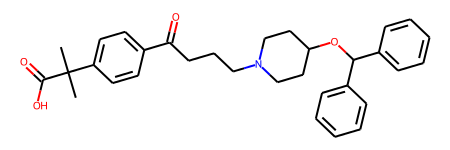

In [939]:
M2 = mol_list [1]
M2

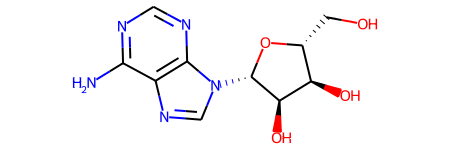

In [940]:
M3 = mol_list [2]
M3

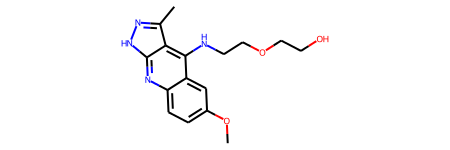

In [941]:
M4 = mol_list [3]
M4

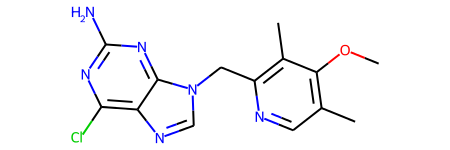

In [942]:
M5 = mol_list [4]
M5

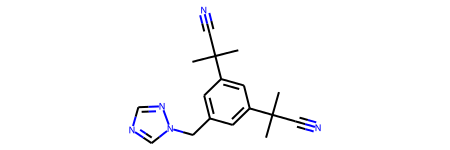

In [943]:
M6 = mol_list [5]
M6

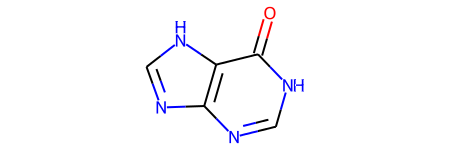

In [944]:
M7 = mol_list [6]
M7

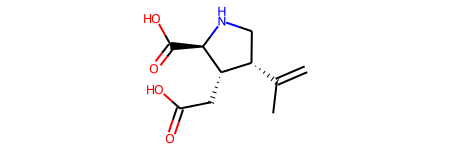

In [945]:
M8 = mol_list [7]
M8

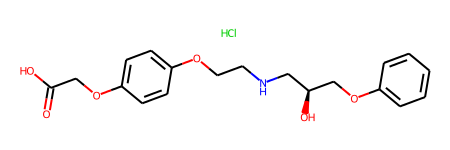

In [946]:
M9 = mol_list [8]
M9

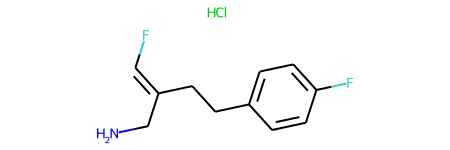

In [947]:
M10 = mol_list [9]
M10

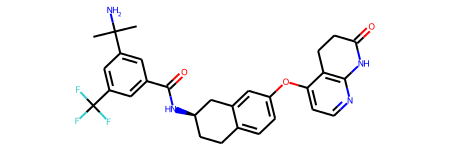

In [948]:
M11 = mol_list [10]
M11

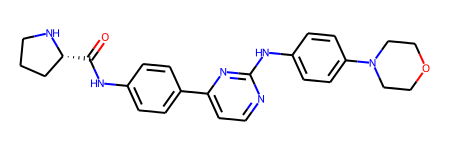

In [949]:
M12 = mol_list [11]
M12

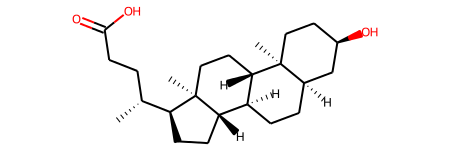

In [950]:
M13 = mol_list [12]
M13

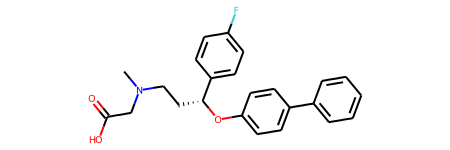

In [951]:
M14 = mol_list [13]
M14

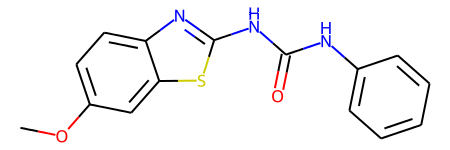

In [952]:
M15 = mol_list [14]
M15

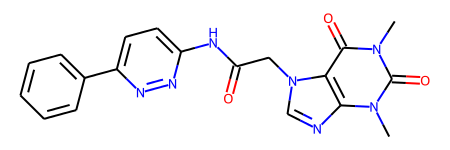

In [953]:
M16 = mol_list [15]
M16

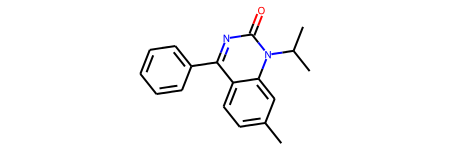

In [954]:
M17 = mol_list [16]
M17

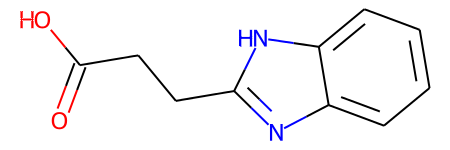

In [955]:
M18 = mol_list [17]
M18

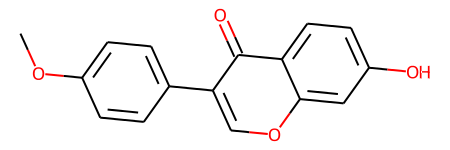

In [956]:
M19 = mol_list [18]
M19

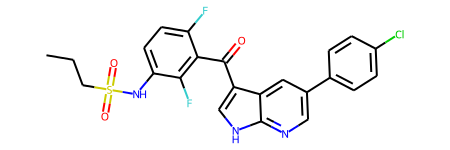

In [957]:
M20 = mol_list [19]
M20

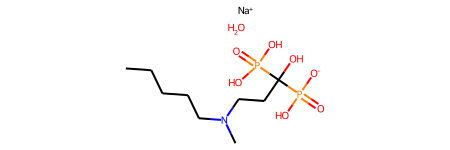

In [958]:
M21 = mol_list [20]
M21

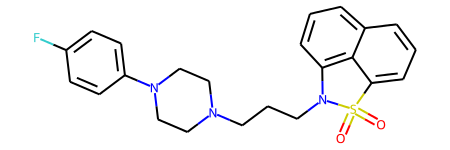

In [959]:
M22 = mol_list [21]
M22

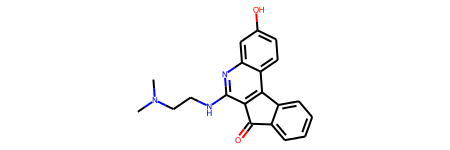

In [960]:
M23 = mol_list [22]
M23

In [961]:
M24 = mol_list [23]
M24

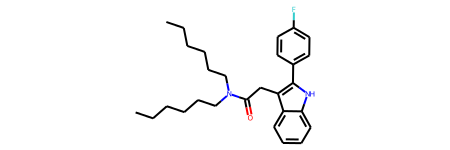

In [962]:
M25 = mol_list [24]
M25

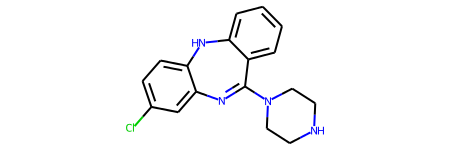

In [963]:
M26 = mol_list [25]
M26

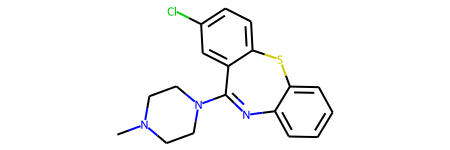

In [964]:
M27 = mol_list [26]
M27

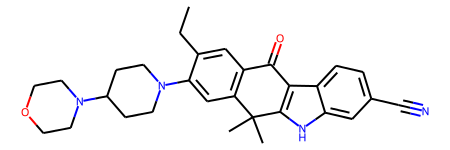

In [965]:
M28 = mol_list [27]
M28

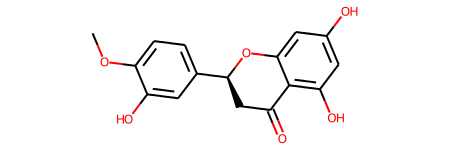

In [966]:
M29 = mol_list [28]
M29

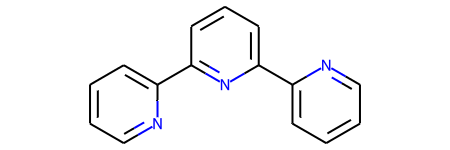

In [967]:
M30 = mol_list [29]
M30

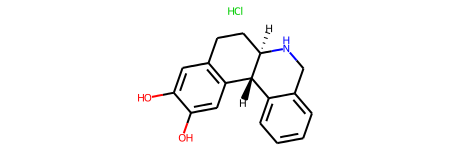

In [968]:
M31 = mol_list [30]
M31

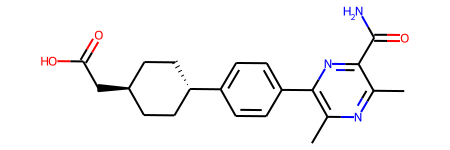

In [969]:
M32 = mol_list [31]
M32

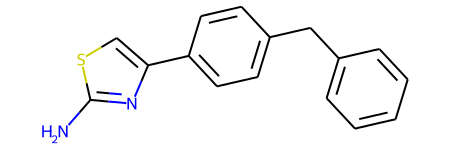

In [970]:
M33 = mol_list [32]
M33

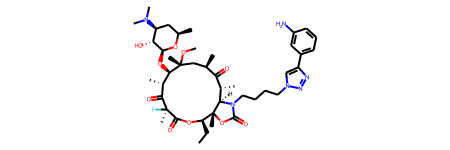

In [971]:
M34 = mol_list [33]
M34

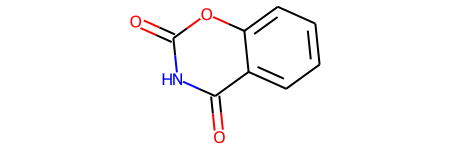

In [972]:
M35 = mol_list [34]
M35

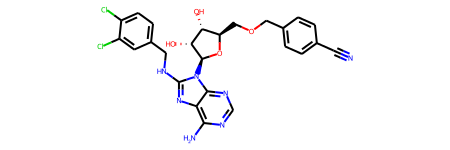

In [973]:
M36 = mol_list [35]
M36

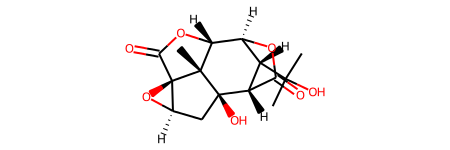

In [974]:
M37= mol_list [36]
M37

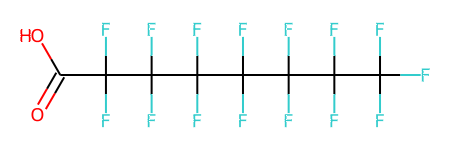

In [975]:
M38= mol_list [37]
M38

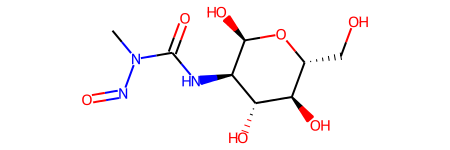

In [976]:
M39= mol_list [38]
M39

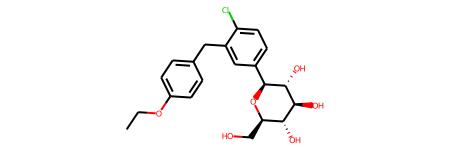

In [977]:
M40= mol_list [39]
M40

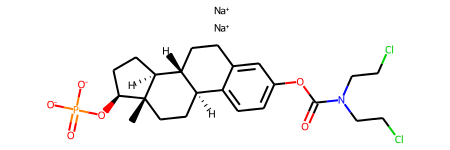

In [978]:
M41= mol_list [40]
M41

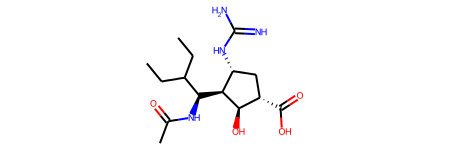

In [979]:
M42= mol_list [41]
M42

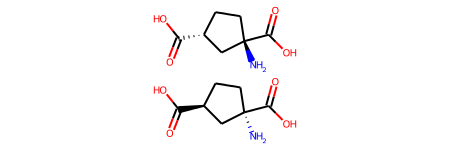

In [980]:
M43= mol_list [42]
M43

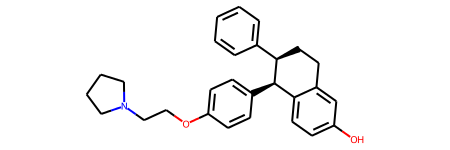

In [981]:
M44= mol_list [43]
M44

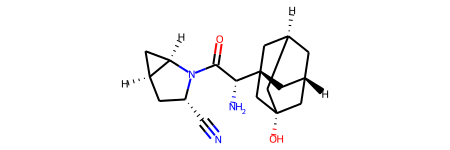

In [982]:
M45= mol_list [44]
M45

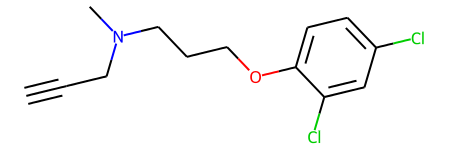

In [983]:
M46= mol_list [45]
M46

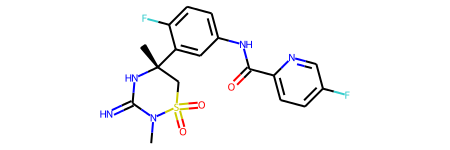

In [984]:
M47= mol_list [46]
M47

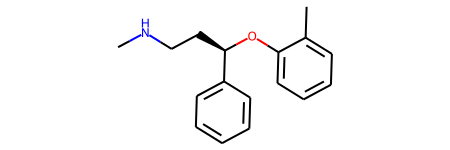

In [985]:
M48= mol_list [47]
M48

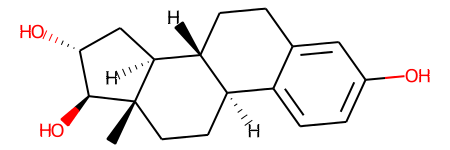

In [986]:
M49= mol_list [48]
M49

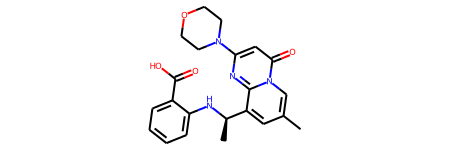

In [987]:
M50= mol_list [49]
M50

In [988]:
bi = {}

fp= AllChem.GetMorganFingerprintAsBitVect(M1, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp, fp_arr)
np.nonzero(fp_arr)
list(fp.GetOnBits())

[3,
 11,
 33,
 36,
 70,
 80,
 102,
 112,
 139,
 180,
 220,
 233,
 250,
 258,
 294,
 305,
 350,
 356,
 360,
 400,
 440,
 452,
 492,
 624,
 650,
 656,
 673,
 674,
 701,
 726,
 790,
 794,
 804,
 807,
 849,
 864,
 875,
 881,
 930,
 931,
 951,
 1019]

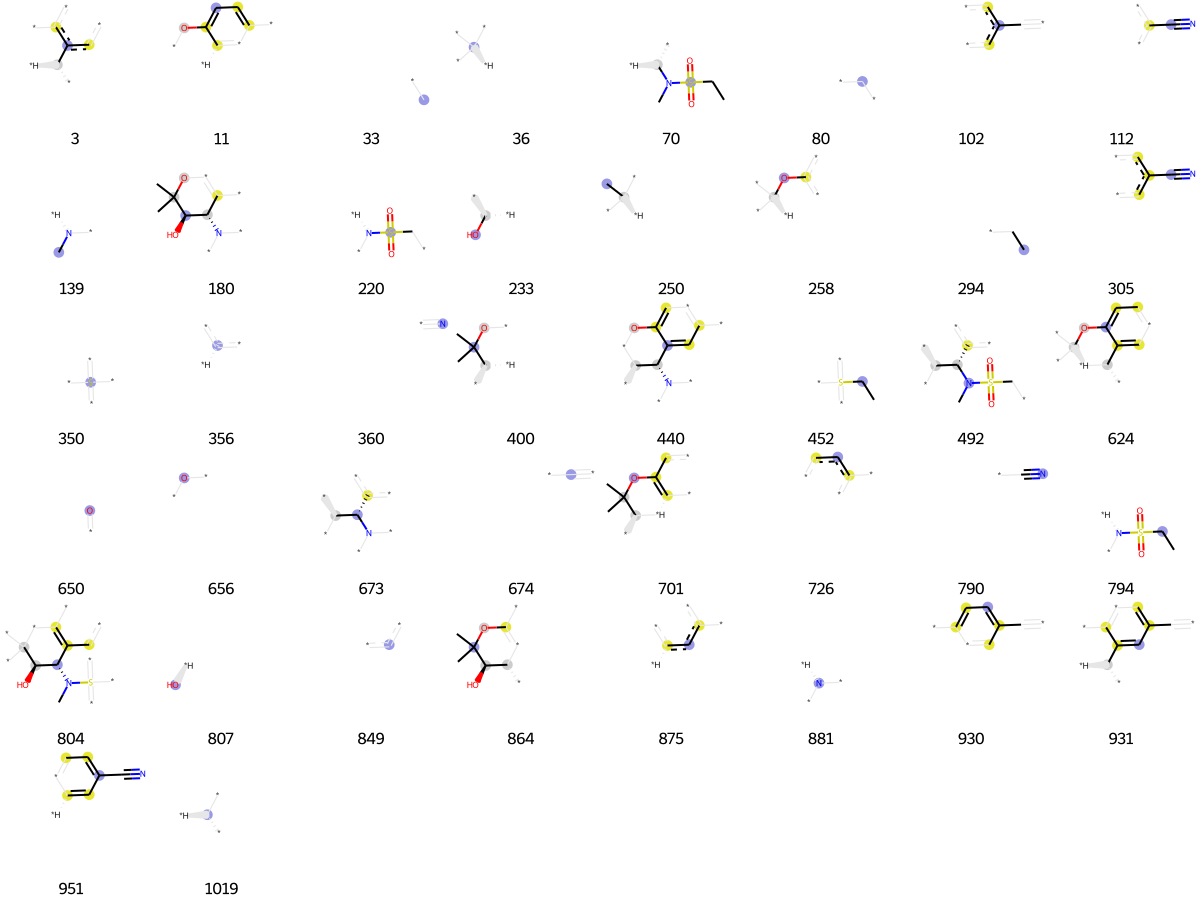

In [989]:
prints = [(M1, x, bi) for x in fp.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp.GetOnBits ()])

In [990]:
bi = {}

fp2= AllChem.GetMorganFingerprintAsBitVect(M2, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp2, fp_arr)
np.nonzero(fp_arr)
list(fp2.GetOnBits())

[1,
 33,
 34,
 64,
 80,
 84,
 114,
 119,
 121,
 141,
 175,
 237,
 261,
 301,
 341,
 356,
 361,
 389,
 392,
 393,
 427,
 456,
 458,
 481,
 540,
 557,
 594,
 629,
 641,
 650,
 653,
 669,
 673,
 695,
 726,
 767,
 807,
 819,
 835,
 845,
 849,
 887,
 893,
 902,
 908,
 926,
 935,
 953,
 959,
 1019,
 1021]

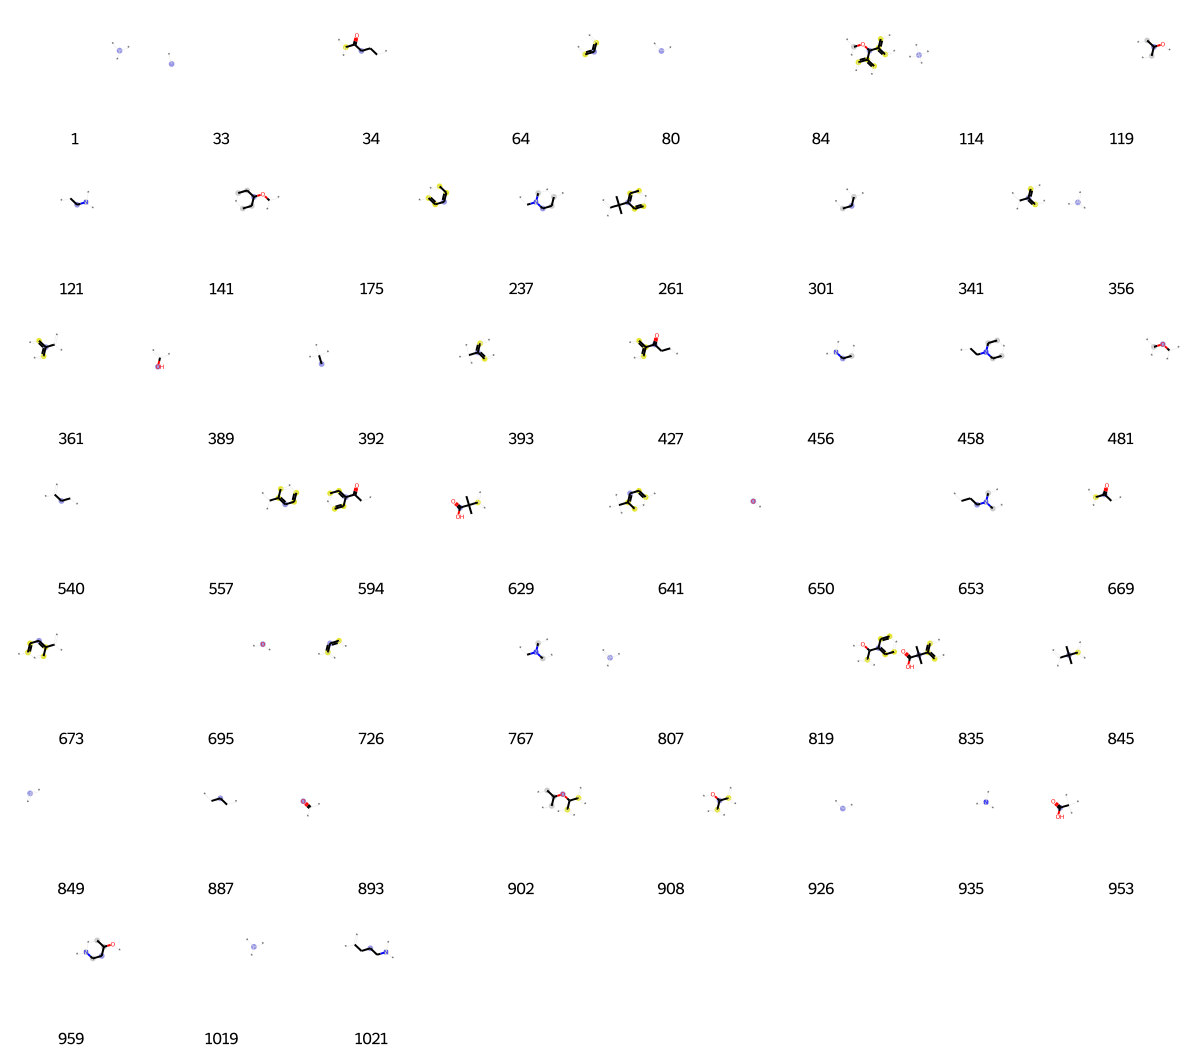

In [991]:
prints = [(M2, x, bi) for x in fp2.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp2.GetOnBits ()])

In [992]:
bi = {}

fp3= AllChem.GetMorganFingerprintAsBitVect(M3, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp3, fp_arr)
np.nonzero(fp_arr)
list(fp3.GetOnBits())

[9,
 71,
 75,
 80,
 147,
 152,
 194,
 209,
 210,
 222,
 229,
 233,
 356,
 378,
 428,
 433,
 435,
 454,
 463,
 489,
 492,
 519,
 548,
 577,
 610,
 656,
 672,
 700,
 740,
 786,
 807,
 820,
 849,
 897,
 932,
 935,
 962,
 1019]

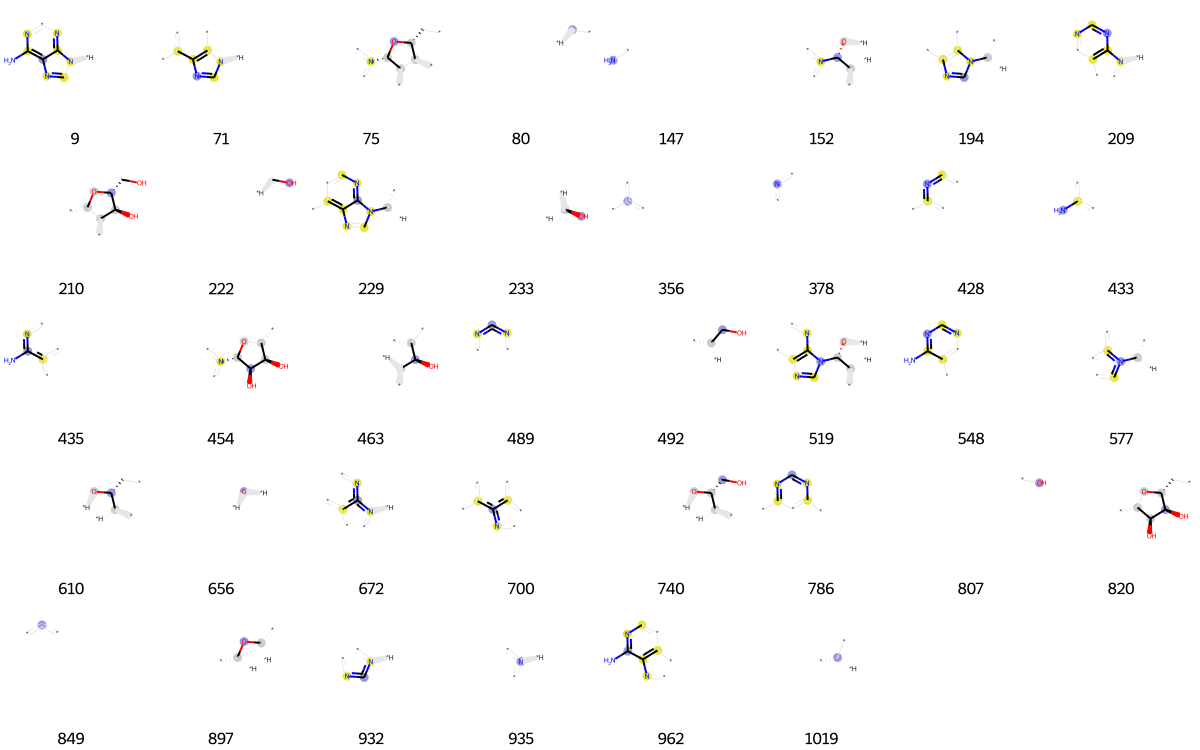

In [993]:
prints = [(M3, x, bi) for x in fp3.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp3.GetOnBits ()])

In [994]:
bi = {}

fp4= AllChem.GetMorganFingerprintAsBitVect(M4, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp4, fp_arr)
np.nonzero(fp_arr)
list(fp4.GetOnBits())

[13,
 33,
 45,
 60,
 73,
 74,
 80,
 90,
 92,
 128,
 182,
 222,
 322,
 333,
 345,
 356,
 378,
 381,
 389,
 392,
 449,
 456,
 460,
 473,
 512,
 591,
 667,
 691,
 695,
 698,
 718,
 726,
 781,
 807,
 831,
 841,
 849,
 875,
 941,
 948,
 960,
 961,
 968,
 974,
 980,
 1022]

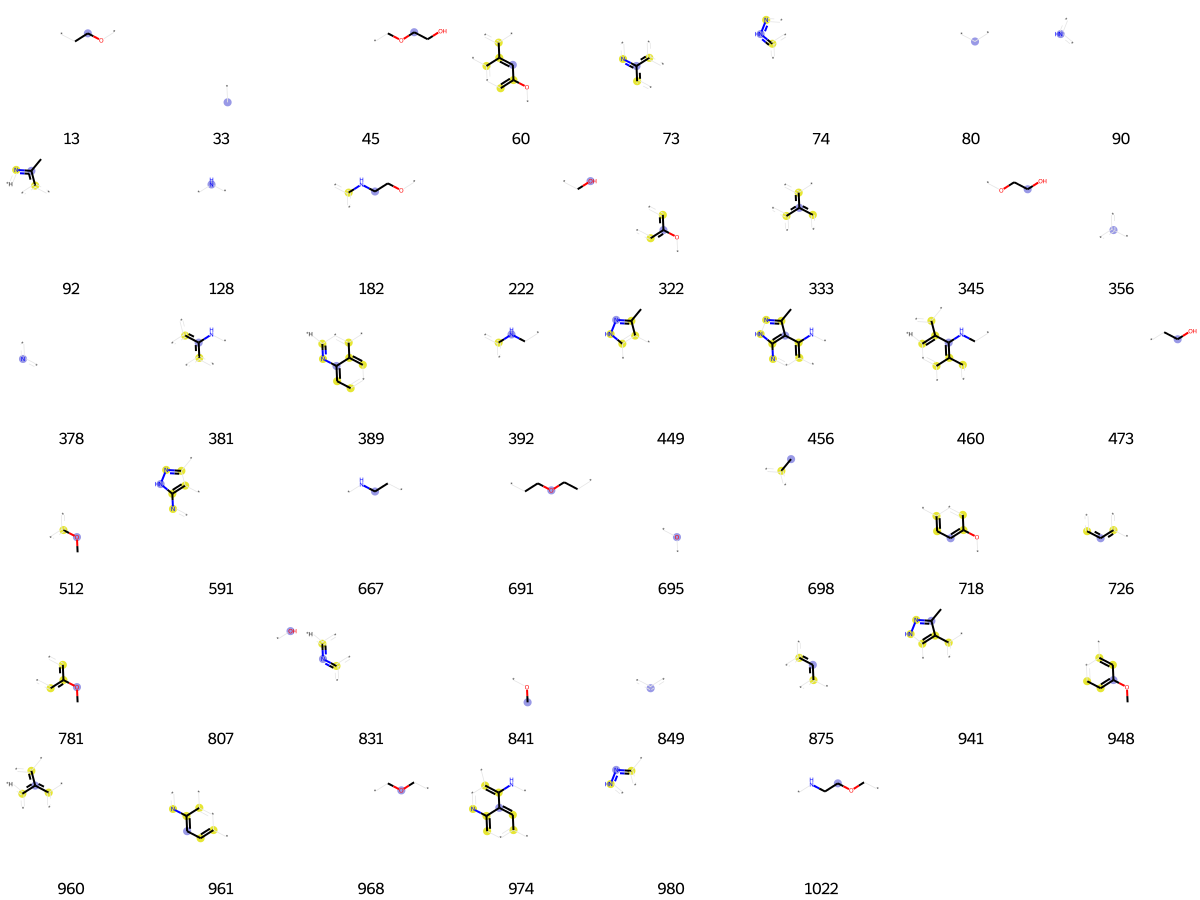

In [995]:
prints = [(M4, x, bi) for x in fp4.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp4.GetOnBits ()])

In [996]:
bi = {}

fp5= AllChem.GetMorganFingerprintAsBitVect(M5, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp5, fp_arr)
np.nonzero(fp_arr)
list(fp5.GetOnBits())

[33,
 71,
 80,
 147,
 150,
 202,
 216,
 252,
 289,
 333,
 339,
 351,
 356,
 367,
 378,
 409,
 428,
 431,
 433,
 511,
 512,
 561,
 575,
 632,
 650,
 659,
 672,
 695,
 698,
 700,
 707,
 722,
 741,
 752,
 765,
 831,
 834,
 841,
 849,
 873,
 909,
 932,
 935,
 937,
 944]

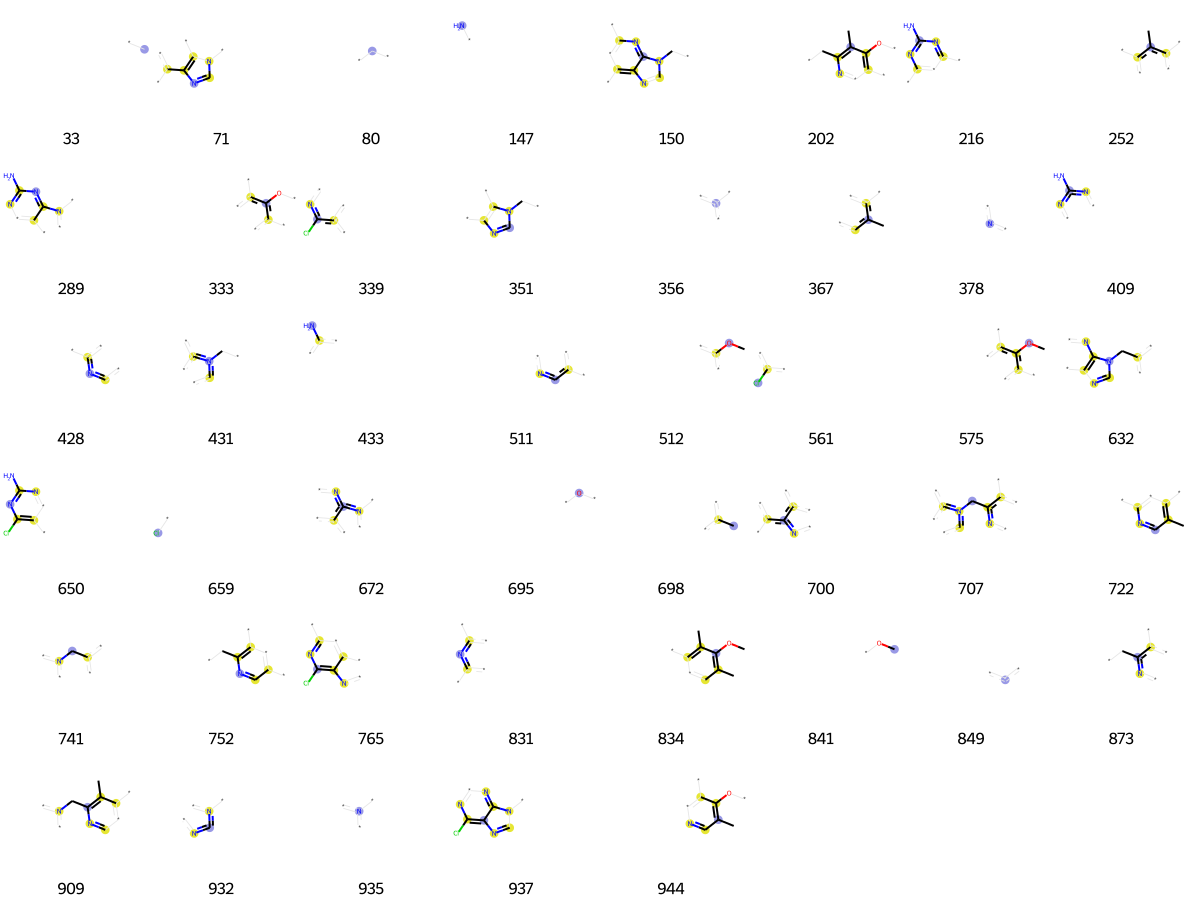

In [997]:
prints = [(M5, x, bi) for x in fp5.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp5.GetOnBits ()])

In [998]:
bi = {}

fp6= AllChem.GetMorganFingerprintAsBitVect(M6, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp6, fp_arr)
np.nonzero(fp_arr)
list(fp6.GetOnBits())

[0,
 33,
 43,
 54,
 80,
 114,
 119,
 342,
 344,
 356,
 360,
 378,
 392,
 393,
 489,
 548,
 579,
 645,
 649,
 651,
 674,
 677,
 730,
 741,
 747,
 754,
 790,
 842,
 849,
 875,
 903,
 932,
 935,
 965]

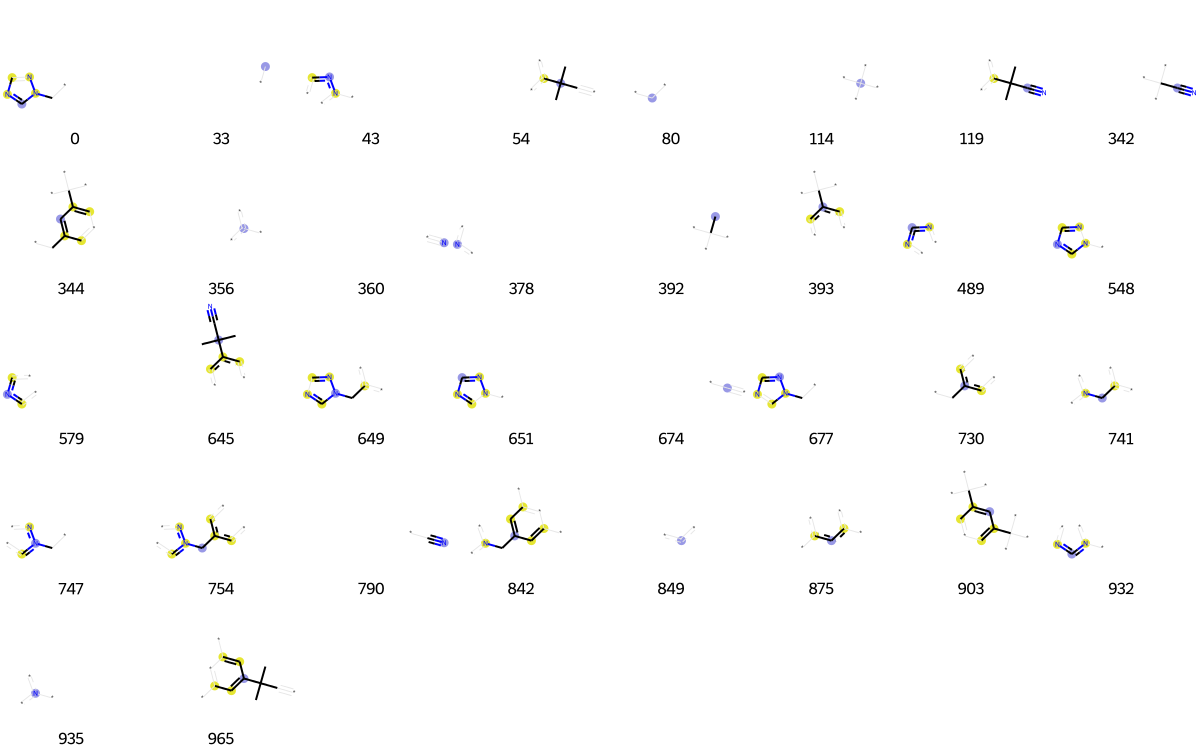

In [999]:
prints = [(M6, x, bi) for x in fp6.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp6.GetOnBits ()])

In [1000]:
bi = {}

fp7= AllChem.GetMorganFingerprintAsBitVect(M7, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp7, fp_arr)
np.nonzero(fp_arr)
list(fp7.GetOnBits())

[0,
 90,
 160,
 314,
 356,
 378,
 428,
 506,
 563,
 600,
 650,
 713,
 750,
 806,
 834,
 849,
 940,
 988]

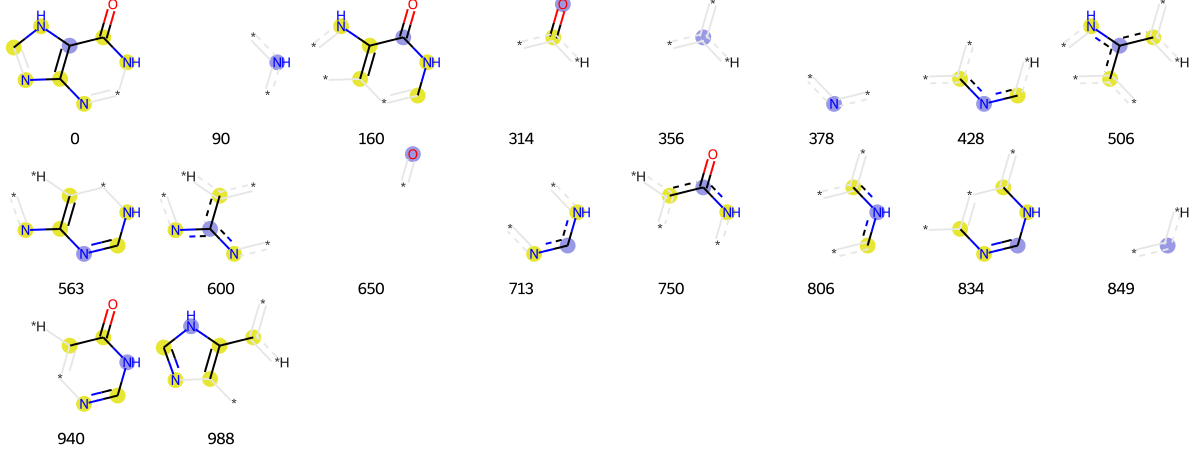

In [1001]:
prints = [(M7, x, bi) for x in fp7.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp7.GetOnBits ()])

In [1002]:
bi = {}

fp8= AllChem.GetMorganFingerprintAsBitVect(M8, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp8, fp_arr)
np.nonzero(fp_arr)
list(fp8.GetOnBits())

[33,
 79,
 80,
 89,
 90,
 108,
 129,
 209,
 285,
 294,
 342,
 357,
 379,
 389,
 407,
 470,
 483,
 650,
 713,
 722,
 807,
 817,
 893,
 909,
 926,
 1004,
 1015,
 1017,
 1019,
 1022]

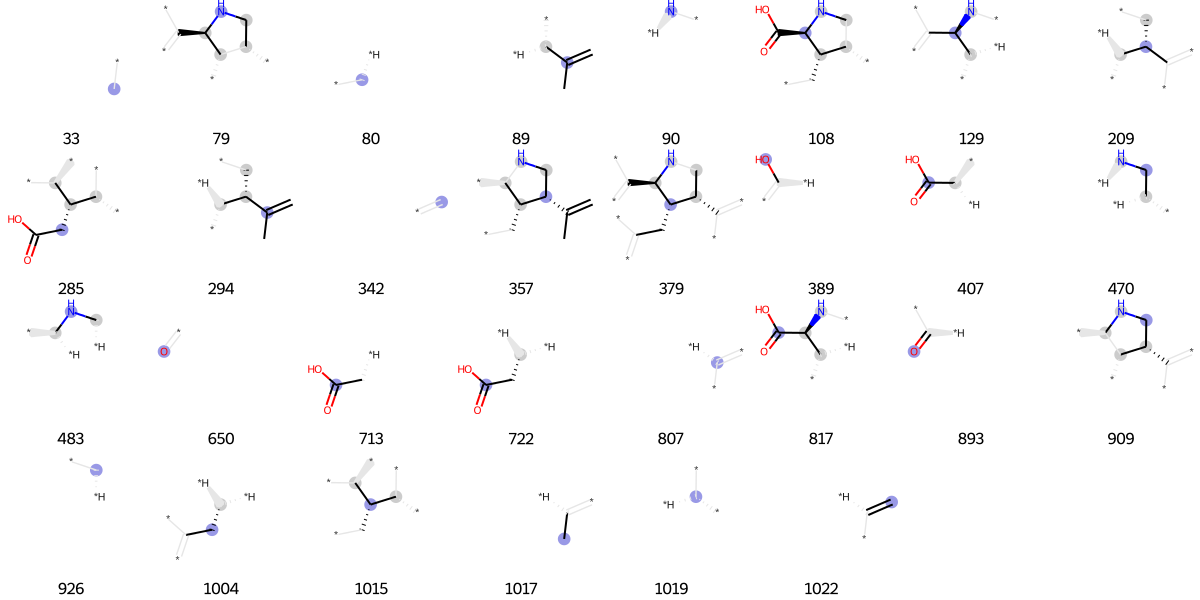

In [1003]:
prints = [(M8, x, bi) for x in fp8.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp8.GetOnBits ()])


In [1004]:
bi = {}

fp9= AllChem.GetMorganFingerprintAsBitVect(M9, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp9, fp_arr)
np.nonzero(fp_arr)
list(fp9.GetOnBits())

[1,
 10,
 13,
 64,
 80,
 102,
 118,
 128,
 175,
 227,
 322,
 356,
 389,
 416,
 421,
 428,
 430,
 457,
 490,
 514,
 562,
 606,
 650,
 658,
 667,
 675,
 684,
 695,
 713,
 718,
 726,
 807,
 849,
 863,
 893,
 980,
 1001,
 1004,
 1014]

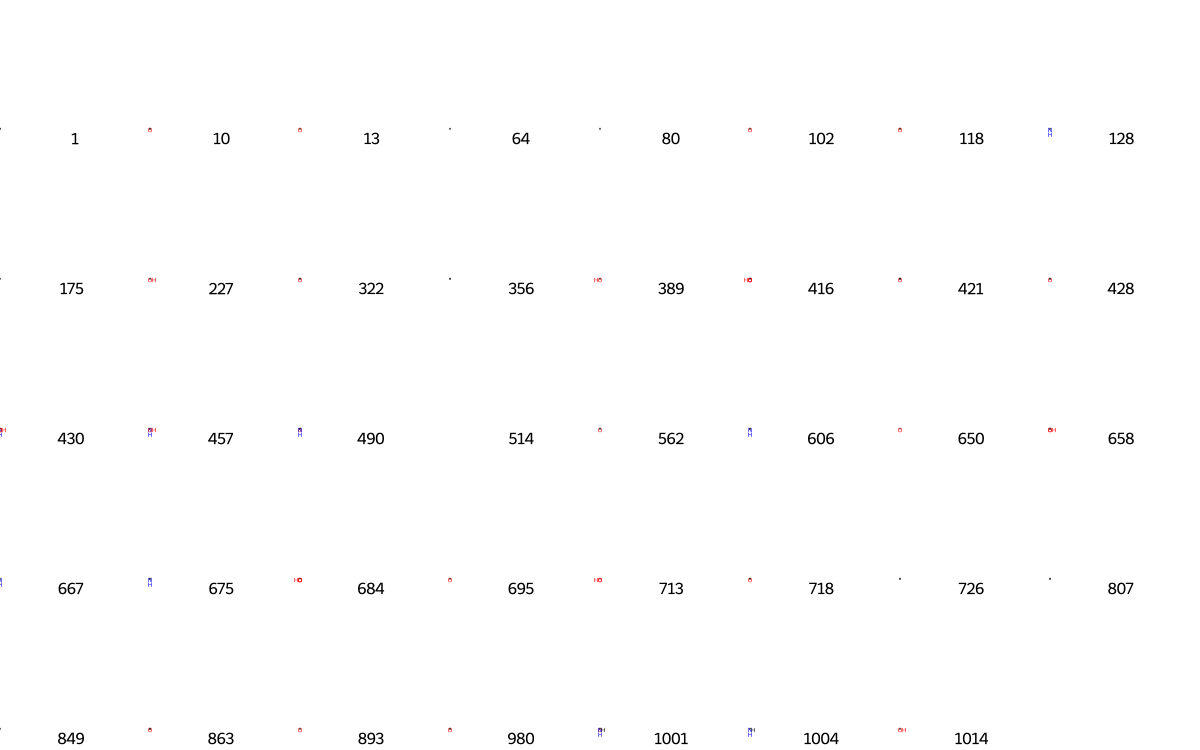

In [1005]:
prints = [(M9, x, bi) for x in fp9.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp9.GetOnBits ()])

In [1006]:
bi = {}

fp10= AllChem.GetMorganFingerprintAsBitVect(M10, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp10, fp_arr)
np.nonzero(fp_arr)
list(fp10.GetOnBits())

[21,
 27,
 52,
 57,
 66,
 80,
 90,
 147,
 219,
 310,
 356,
 362,
 379,
 386,
 514,
 540,
 625,
 646,
 688,
 694,
 699,
 726,
 730,
 807,
 849,
 883,
 904,
 981]

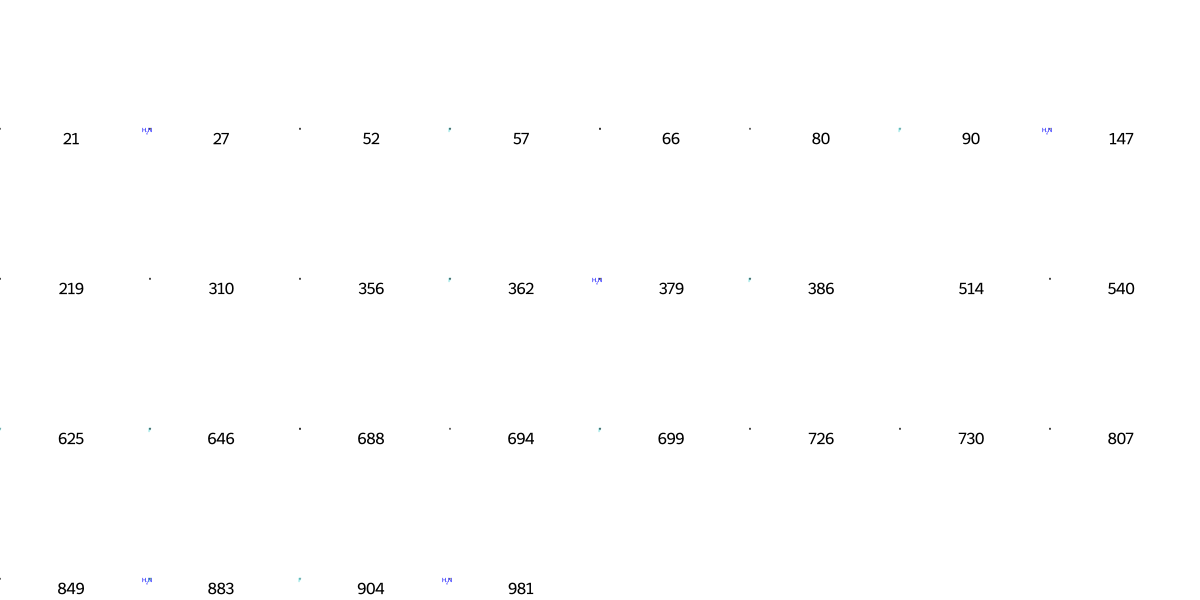

In [1007]:
prints = [(M10, x, bi) for x in fp10.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp10.GetOnBits ()])

In [1008]:
bi = {}

fp11= AllChem.GetMorganFingerprintAsBitVect(M11, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp11, fp_arr)
np.nonzero(fp_arr)
list(fp11.GetOnBits())

[30,
 33,
 36,
 90,
 114,
 128,
 134,
 147,
 212,
 225,
 231,
 236,
 240,
 242,
 301,
 312,
 314,
 319,
 322,
 346,
 356,
 361,
 378,
 380,
 387,
 392,
 393,
 428,
 429,
 452,
 486,
 539,
 551,
 593,
 606,
 610,
 647,
 650,
 667,
 668,
 674,
 675,
 687,
 695,
 713,
 714,
 718,
 726,
 787,
 795,
 807,
 809,
 842,
 849,
 875,
 893,
 903,
 904,
 918,
 924,
 926,
 946,
 956,
 973,
 988,
 1002,
 1019]

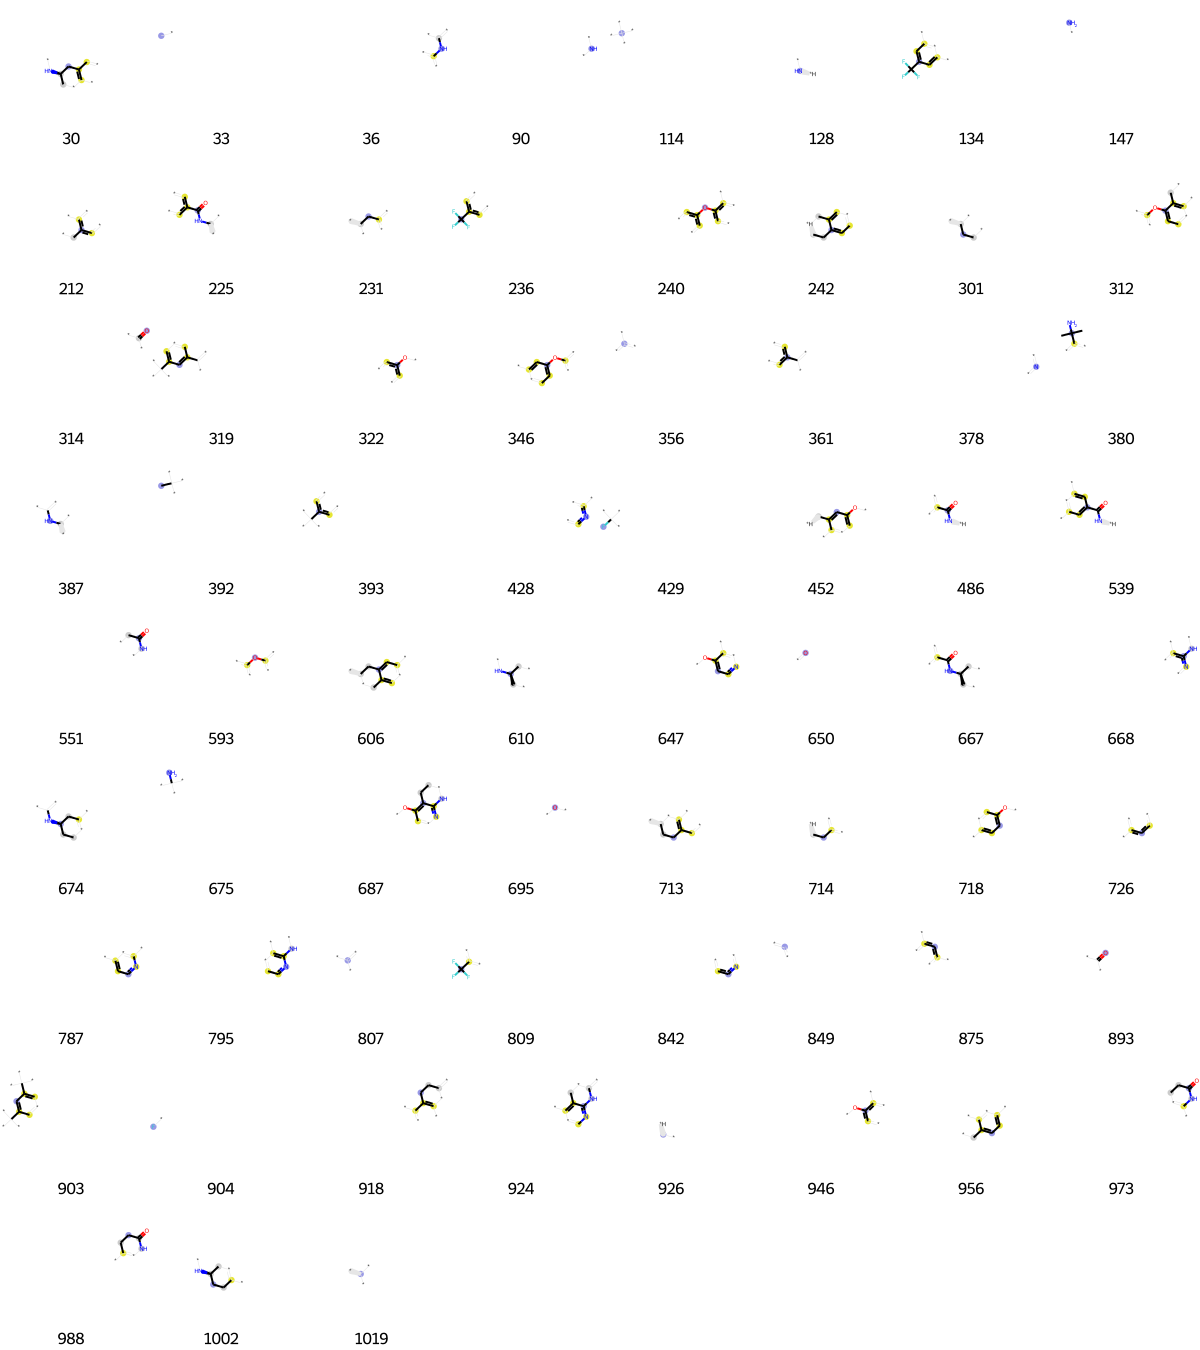

In [1009]:
prints = [(M11, x, bi) for x in fp11.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp11.GetOnBits ()])

In [1010]:
bi = {}

fp12= AllChem.GetMorganFingerprintAsBitVect(M12, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp12, fp_arr)
np.nonzero(fp_arr)
list(fp12.GetOnBits())

[4,
 53,
 61,
 90,
 128,
 136,
 146,
 191,
 233,
 246,
 263,
 301,
 305,
 356,
 362,
 378,
 381,
 399,
 407,
 417,
 428,
 456,
 458,
 483,
 491,
 500,
 523,
 558,
 562,
 650,
 656,
 687,
 689,
 712,
 726,
 742,
 787,
 792,
 795,
 801,
 807,
 831,
 842,
 843,
 849,
 888,
 893,
 896,
 926,
 935,
 947,
 950,
 980,
 1012,
 1014,
 1019]

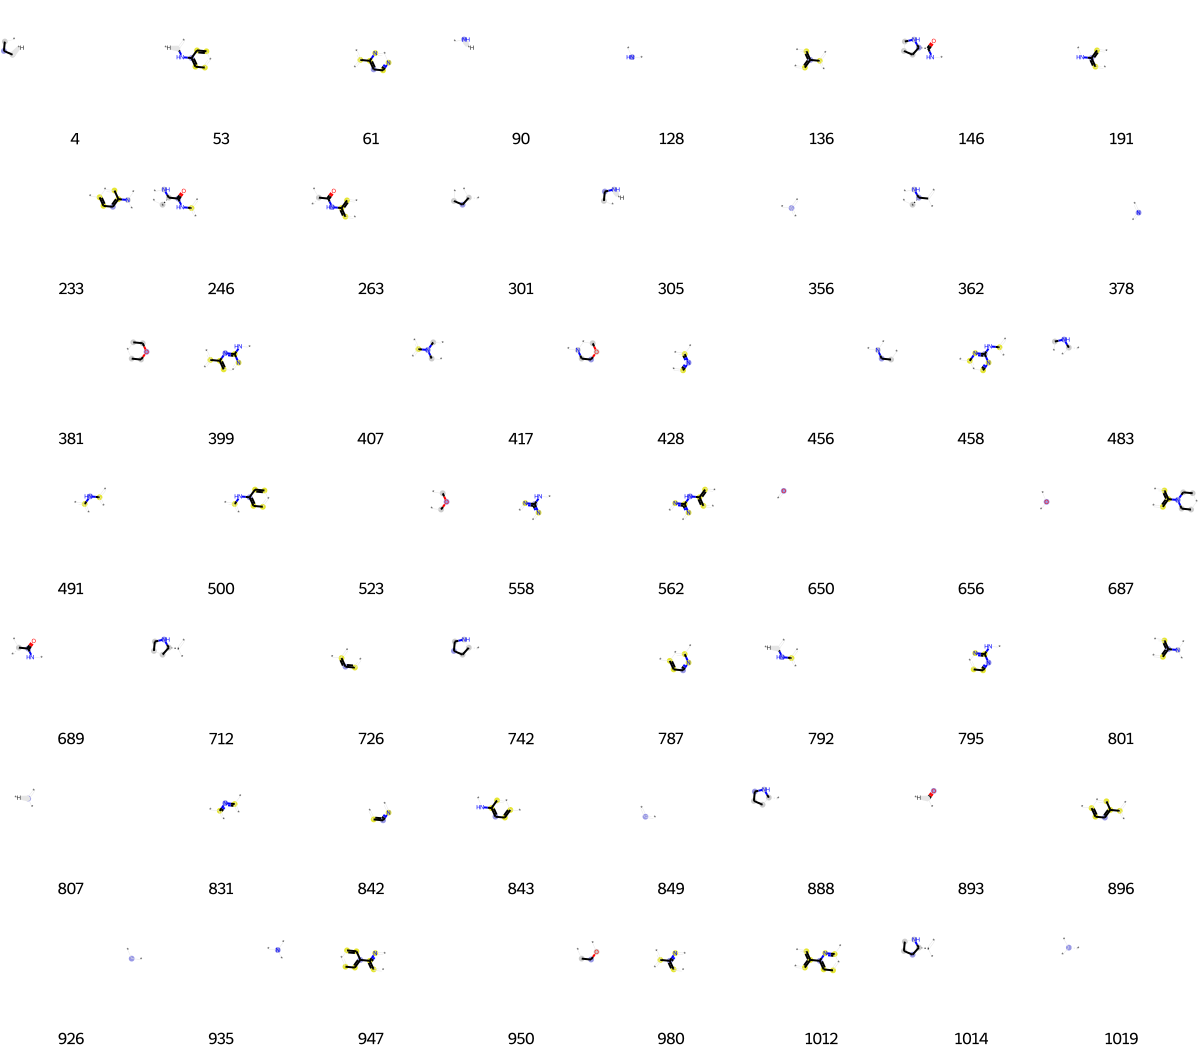

In [1011]:
prints = [(M12, x, bi) for x in fp12.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp12.GetOnBits ()])

In [1012]:
bi = {}

fp13= AllChem.GetMorganFingerprintAsBitVect(M13, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp13, fp_arr)
np.nonzero(fp_arr)
list(fp13.GetOnBits())

[1,
 8,
 26,
 29,
 33,
 36,
 71,
 80,
 105,
 138,
 144,
 233,
 243,
 250,
 263,
 268,
 283,
 301,
 324,
 389,
 453,
 500,
 519,
 522,
 528,
 529,
 531,
 540,
 562,
 590,
 622,
 650,
 669,
 713,
 739,
 753,
 775,
 784,
 807,
 893,
 926,
 927,
 955,
 956,
 1019]

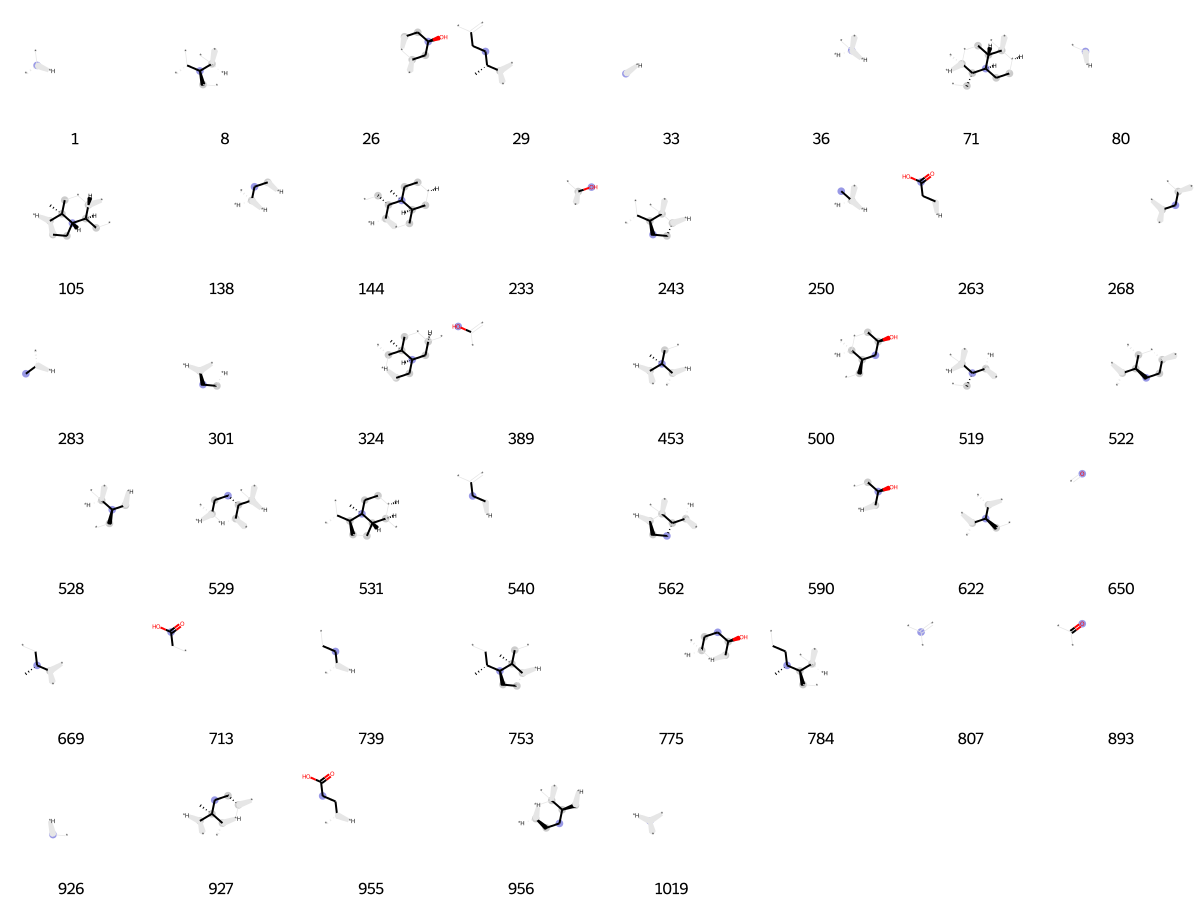

In [1013]:
prints = [(M13, x, bi) for x in fp13.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp13.GetOnBits ()])

In [1014]:
bi = {}

fp14= AllChem.GetMorganFingerprintAsBitVect(M14, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp14, fp_arr)
np.nonzero(fp_arr)
list(fp14.GetOnBits())

[1,
 33,
 41,
 64,
 80,
 90,
 123,
 136,
 139,
 166,
 175,
 212,
 322,
 341,
 356,
 386,
 389,
 411,
 429,
 538,
 605,
 646,
 650,
 664,
 684,
 695,
 699,
 713,
 718,
 726,
 736,
 737,
 739,
 807,
 829,
 849,
 881,
 887,
 893,
 896,
 904,
 927,
 940,
 968]

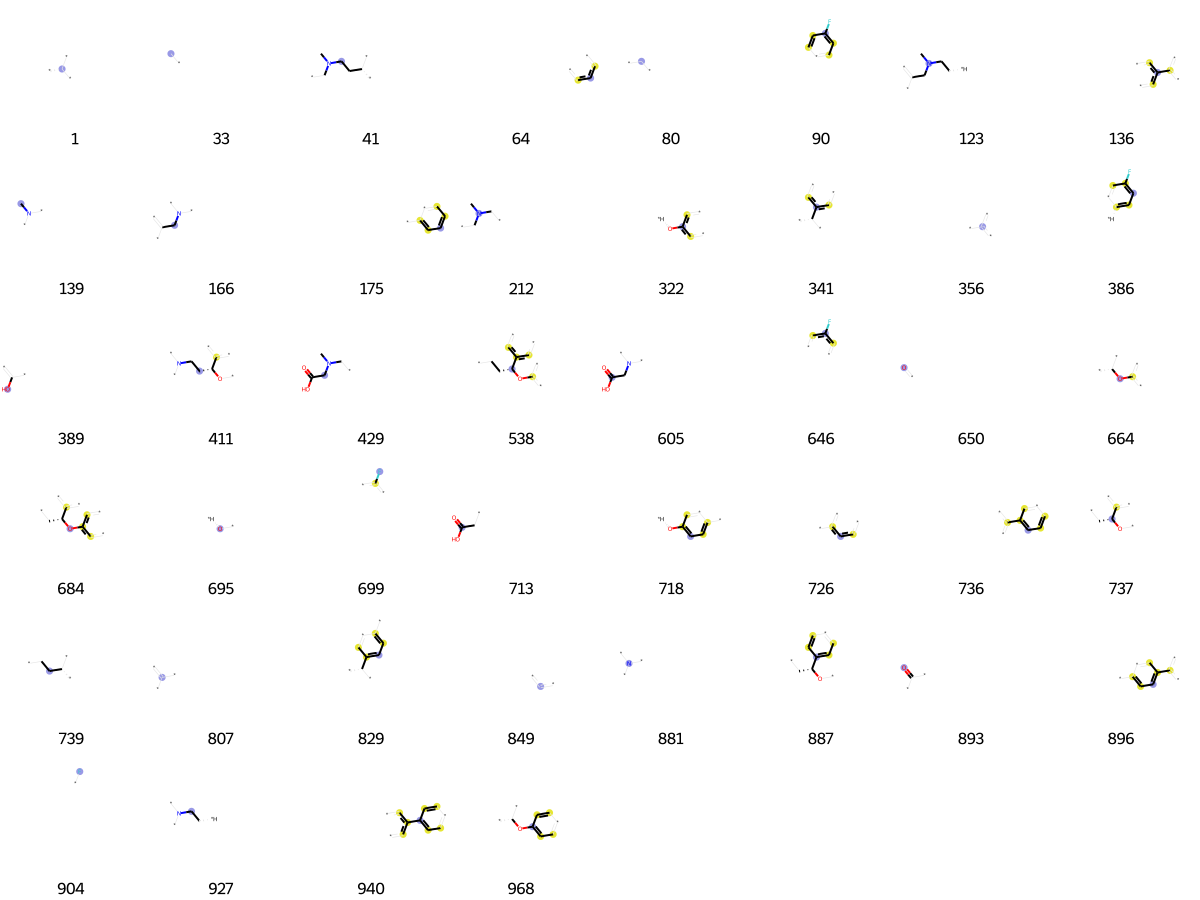

In [1015]:
prints = [(M14, x, bi) for x in fp14.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp14.GetOnBits ()])

In [1016]:
bi = {}

fp15= AllChem.GetMorganFingerprintAsBitVect(M15, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp15, fp_arr)
np.nonzero(fp_arr)
list(fp15.GetOnBits())

[33,
 53,
 56,
 64,
 73,
 128,
 156,
 162,
 175,
 191,
 317,
 322,
 356,
 376,
 378,
 385,
 389,
 493,
 512,
 557,
 645,
 650,
 675,
 695,
 703,
 716,
 718,
 726,
 781,
 792,
 807,
 831,
 841,
 849,
 875,
 885,
 893,
 948,
 961,
 965,
 966]

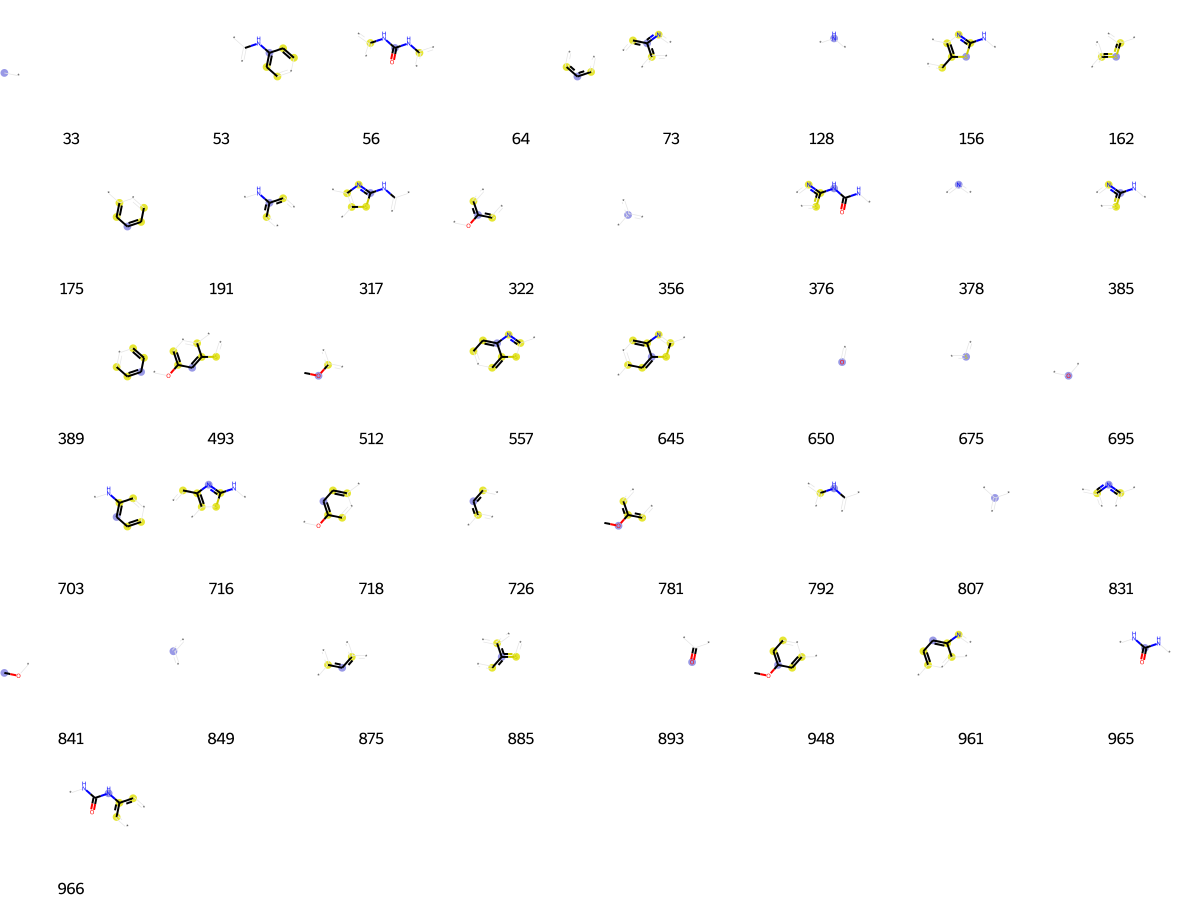

In [1017]:
prints = [(M15, x, bi) for x in fp15.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp15.GetOnBits ()])

In [1018]:
bi = {}

fp16= AllChem.GetMorganFingerprintAsBitVect(M16, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp16, fp_arr)
np.nonzero(fp_arr)
list(fp16.GetOnBits())

[0,
 1,
 33,
 41,
 64,
 75,
 80,
 121,
 128,
 136,
 140,
 175,
 179,
 184,
 234,
 260,
 283,
 288,
 314,
 351,
 354,
 356,
 378,
 389,
 400,
 416,
 420,
 428,
 431,
 504,
 563,
 564,
 576,
 625,
 650,
 672,
 726,
 736,
 771,
 792,
 807,
 849,
 893,
 932,
 935,
 947,
 967,
 980]

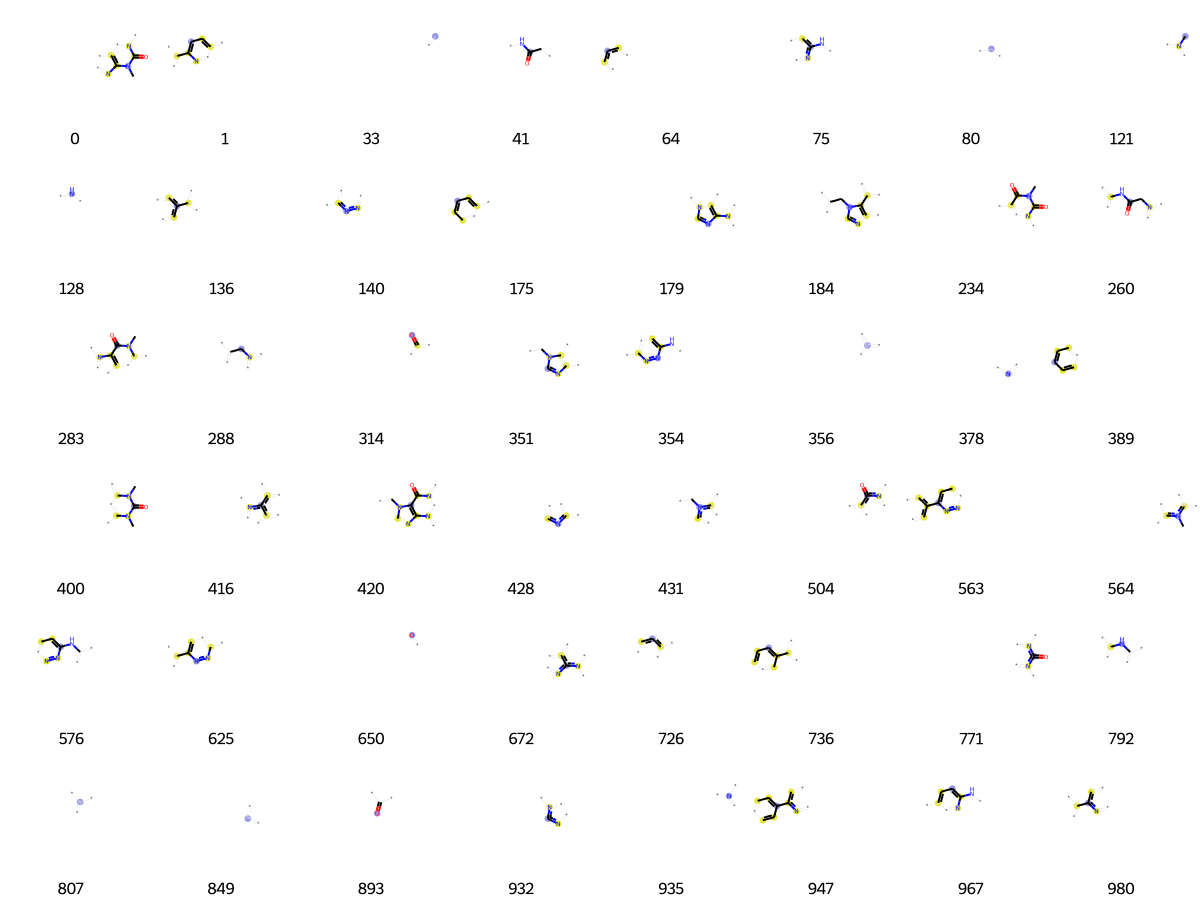

In [1019]:
prints = [(M16, x, bi) for x in fp16.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp16.GetOnBits ()])

In [1020]:
bi = {}

fp17= AllChem.GetMorganFingerprintAsBitVect(M17, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp17, fp_arr)
np.nonzero(fp_arr)
list(fp17.GetOnBits())

[1,
 33,
 45,
 50,
 64,
 136,
 157,
 175,
 235,
 283,
 314,
 323,
 333,
 356,
 378,
 389,
 471,
 591,
 626,
 636,
 639,
 650,
 698,
 709,
 726,
 736,
 768,
 799,
 831,
 849,
 862,
 863,
 875,
 906,
 935,
 994,
 1013]

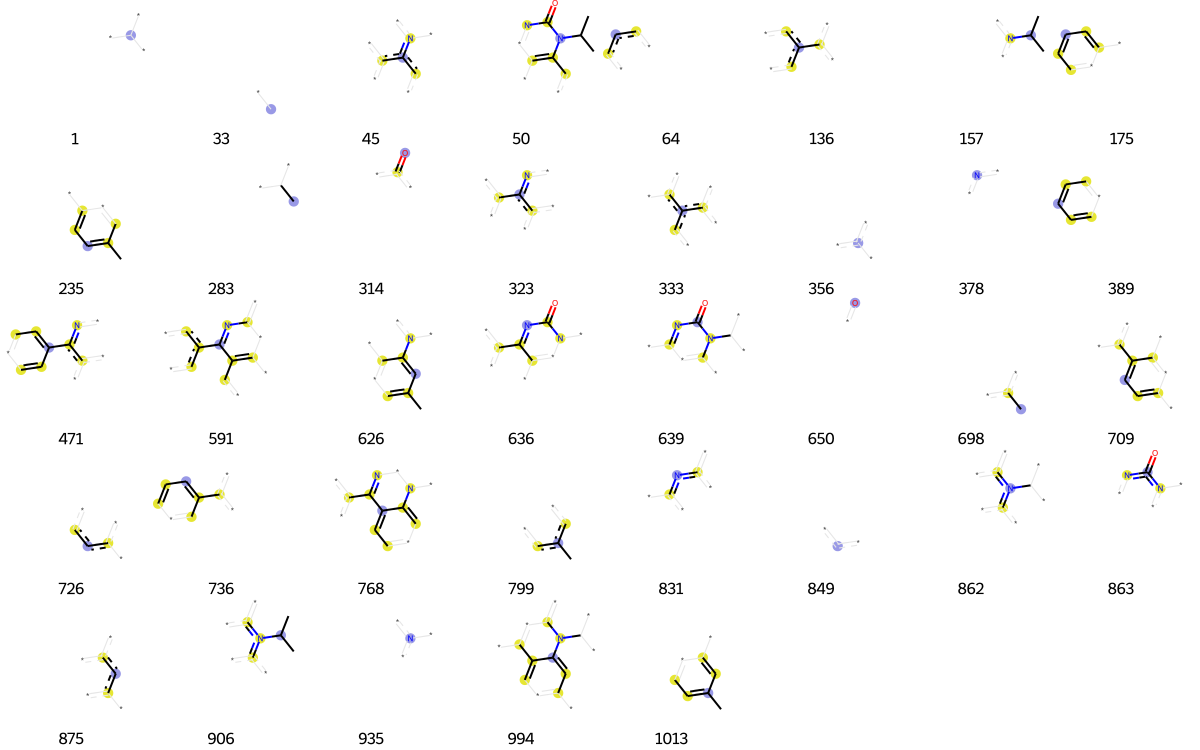

In [1021]:
prints = [(M17, x, bi) for x in fp17.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp17.GetOnBits ()])

In [1022]:
bi = {}

fp18= AllChem.GetMorganFingerprintAsBitVect(M18, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp18, fp_arr)
np.nonzero(fp_arr)
list(fp18.GetOnBits())

[64,
 73,
 80,
 83,
 90,
 119,
 175,
 219,
 263,
 278,
 289,
 343,
 356,
 378,
 389,
 535,
 540,
 644,
 650,
 694,
 713,
 721,
 726,
 759,
 807,
 831,
 839,
 849,
 857,
 893]

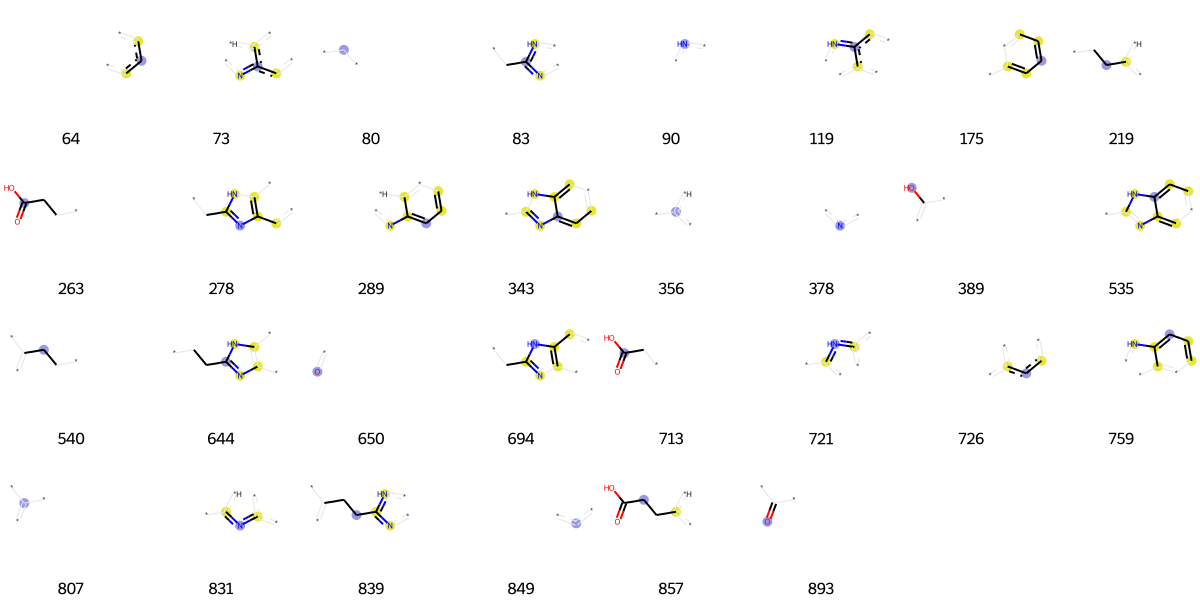

In [1023]:
prints = [(M18, x, bi) for x in fp18.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp18.GetOnBits ()])

In [1024]:
bi = {}

fp19= AllChem.GetMorganFingerprintAsBitVect(M19, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp19, fp_arr)
np.nonzero(fp_arr)
list(fp19.GetOnBits())

[33,
 136,
 209,
 222,
 237,
 289,
 304,
 314,
 322,
 333,
 352,
 356,
 381,
 384,
 465,
 472,
 512,
 525,
 578,
 650,
 656,
 690,
 695,
 709,
 718,
 726,
 745,
 781,
 784,
 807,
 831,
 841,
 849,
 875,
 896,
 941,
 1017]

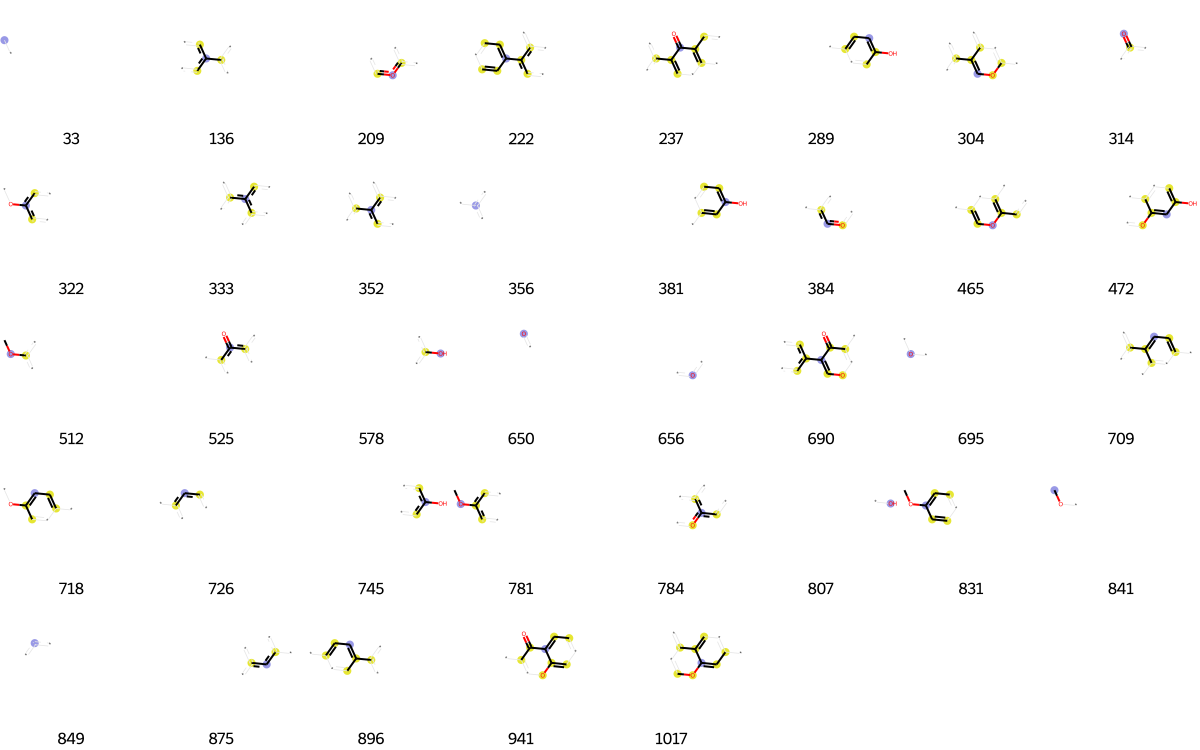

In [1025]:
prints = [(M19, x, bi) for x in fp19.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp19.GetOnBits ()])

In [1026]:
bi = {}

fp20= AllChem.GetMorganFingerprintAsBitVect(M20, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp20, fp_arr)
np.nonzero(fp_arr)
list(fp20.GetOnBits())

[9,
 26,
 33,
 46,
 80,
 87,
 90,
 128,
 136,
 169,
 200,
 216,
 234,
 246,
 293,
 294,
 315,
 333,
 350,
 356,
 378,
 421,
 428,
 433,
 452,
 463,
 477,
 479,
 481,
 503,
 511,
 551,
 561,
 586,
 601,
 610,
 650,
 659,
 699,
 714,
 726,
 794,
 806,
 807,
 816,
 827,
 832,
 849,
 855,
 856,
 875,
 893,
 896,
 904,
 940,
 967,
 986]

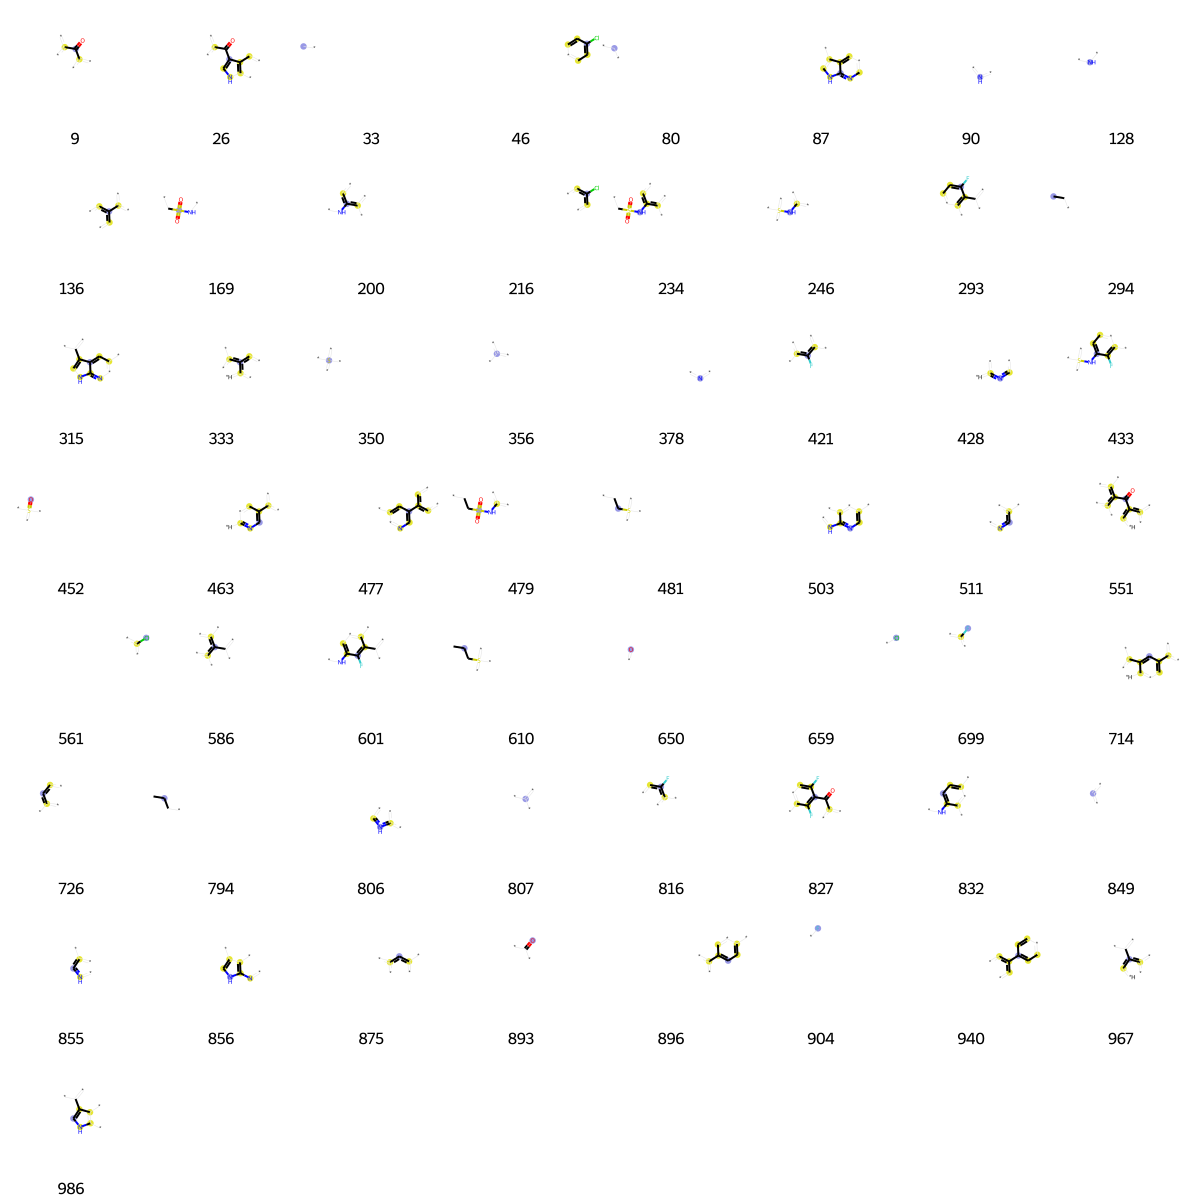

In [1027]:
prints = [(M20, x, bi) for x in fp20.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp20.GetOnBits ()])

In [1028]:
bi = {}

fp21= AllChem.GetMorganFingerprintAsBitVect(M21, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp21, fp_arr)
np.nonzero(fp_arr)
list(fp21.GetOnBits())

[33,
 80,
 114,
 139,
 181,
 189,
 192,
 212,
 230,
 284,
 294,
 420,
 476,
 480,
 486,
 506,
 563,
 591,
 645,
 650,
 677,
 715,
 790,
 794,
 807,
 814,
 874,
 881,
 884,
 887,
 889,
 927,
 960,
 971]

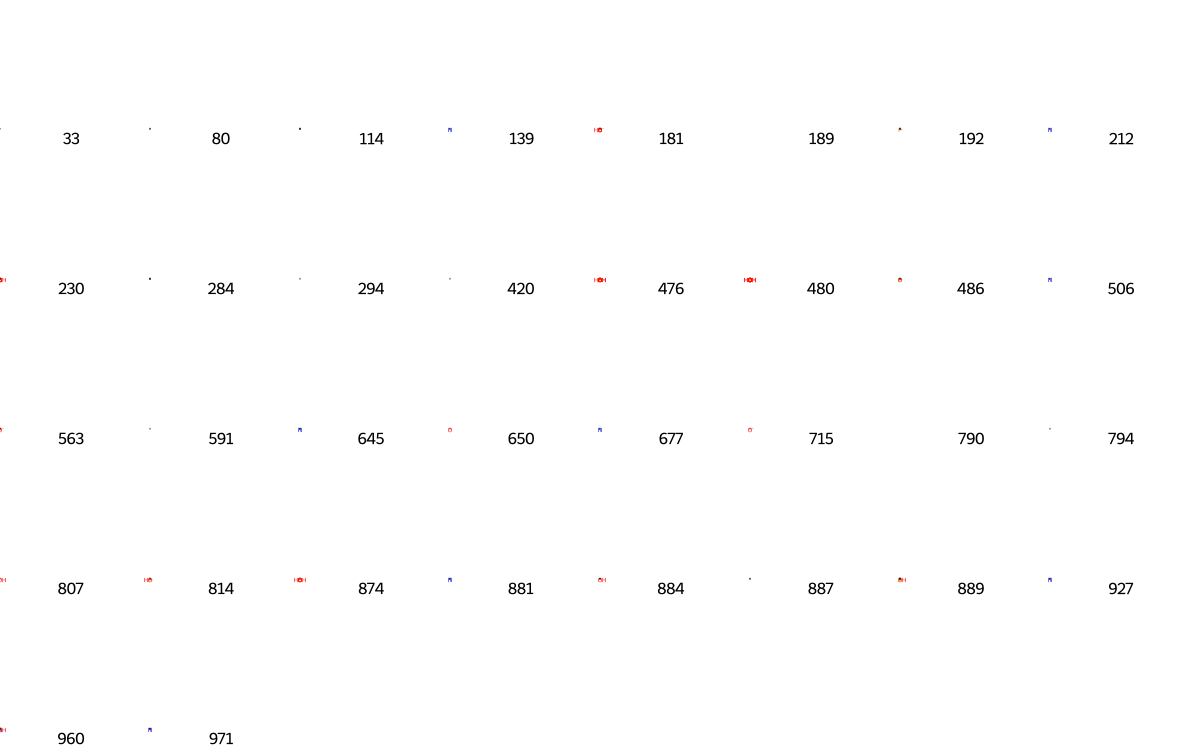

In [1029]:
prints = [(M21, x, bi) for x in fp21.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp21.GetOnBits ()])

In [1030]:
bi = {}

fp22= AllChem.GetMorganFingerprintAsBitVect(M22, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp22, fp_arr)
np.nonzero(fp_arr)
list(fp22.GetOnBits())

[15,
 63,
 64,
 74,
 80,
 90,
 121,
 142,
 148,
 207,
 233,
 261,
 271,
 356,
 381,
 386,
 404,
 407,
 422,
 456,
 458,
 467,
 469,
 484,
 591,
 623,
 646,
 650,
 653,
 687,
 699,
 725,
 726,
 767,
 801,
 804,
 827,
 831,
 849,
 887,
 904,
 924,
 926,
 935,
 960,
 990]

In [1031]:
bi = {}

fp23= AllChem.GetMorganFingerprintAsBitVect(M23, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp23, fp_arr)
np.nonzero(fp_arr)
list(fp23.GetOnBits())

[1,
 33,
 59,
 64,
 73,
 80,
 82,
 128,
 139,
 162,
 172,
 175,
 177,
 249,
 289,
 314,
 333,
 352,
 356,
 378,
 381,
 392,
 415,
 452,
 462,
 578,
 650,
 652,
 667,
 671,
 693,
 708,
 709,
 723,
 726,
 745,
 807,
 831,
 849,
 875,
 881,
 897,
 927,
 958,
 973,
 984]

/usr/local/lib/python3.7/dist-packages/IPython/core/displayhook.py:260: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  'Flushing oldest {cull_count} entries.'.format(sz=sz, cull_count=cull_count))


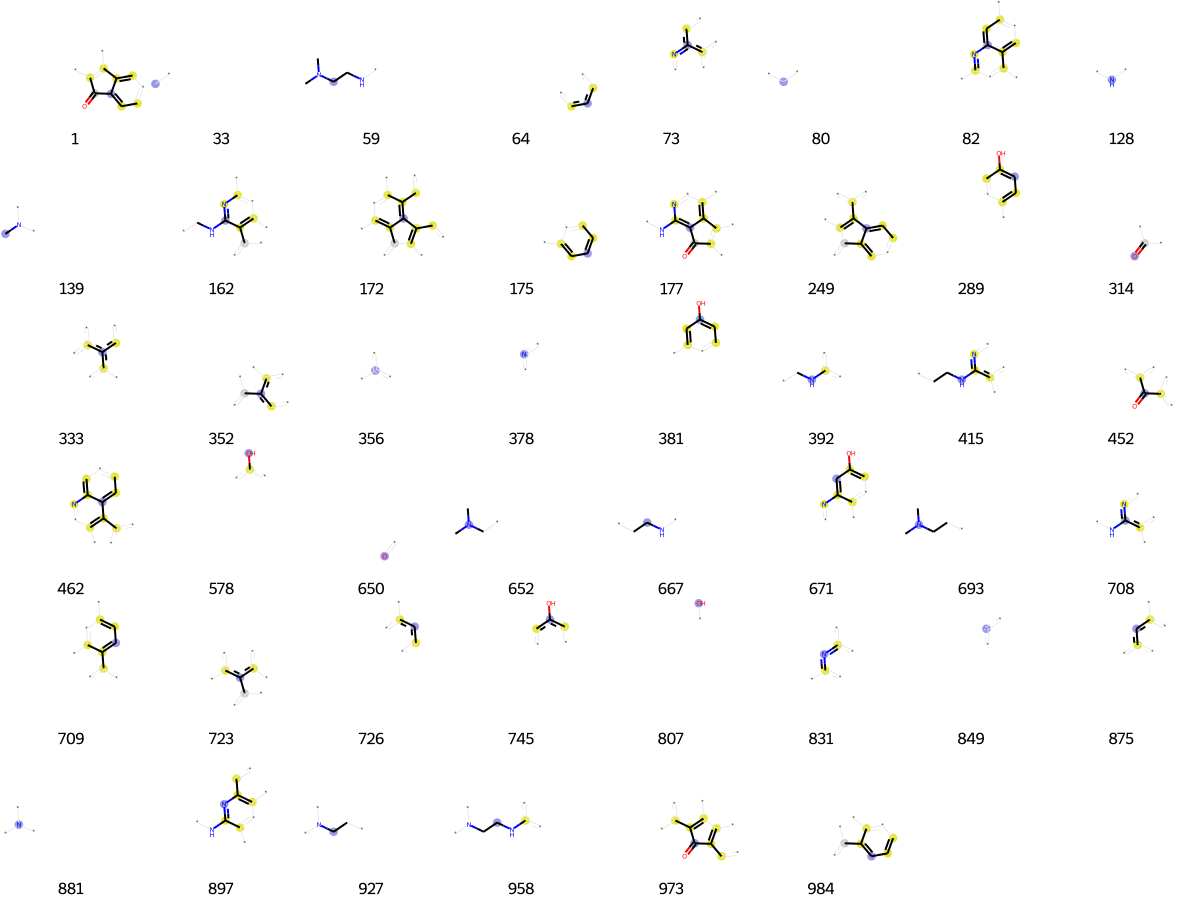

In [1032]:
prints = [(M23, x, bi) for x in fp23.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp23.GetOnBits ()])

In [1033]:
bi = {}

fp25= AllChem.GetMorganFingerprintAsBitVect(M25, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp25, fp_arr)
np.nonzero(fp_arr)
list(fp25.GetOnBits())

[33,
 64,
 80,
 90,
 119,
 136,
 155,
 175,
 214,
 216,
 248,
 275,
 293,
 294,
 325,
 333,
 356,
 386,
 418,
 420,
 549,
 591,
 645,
 646,
 650,
 661,
 699,
 721,
 726,
 759,
 794,
 799,
 807,
 849,
 881,
 887,
 893,
 896,
 904,
 927,
 936,
 978,
 1010]

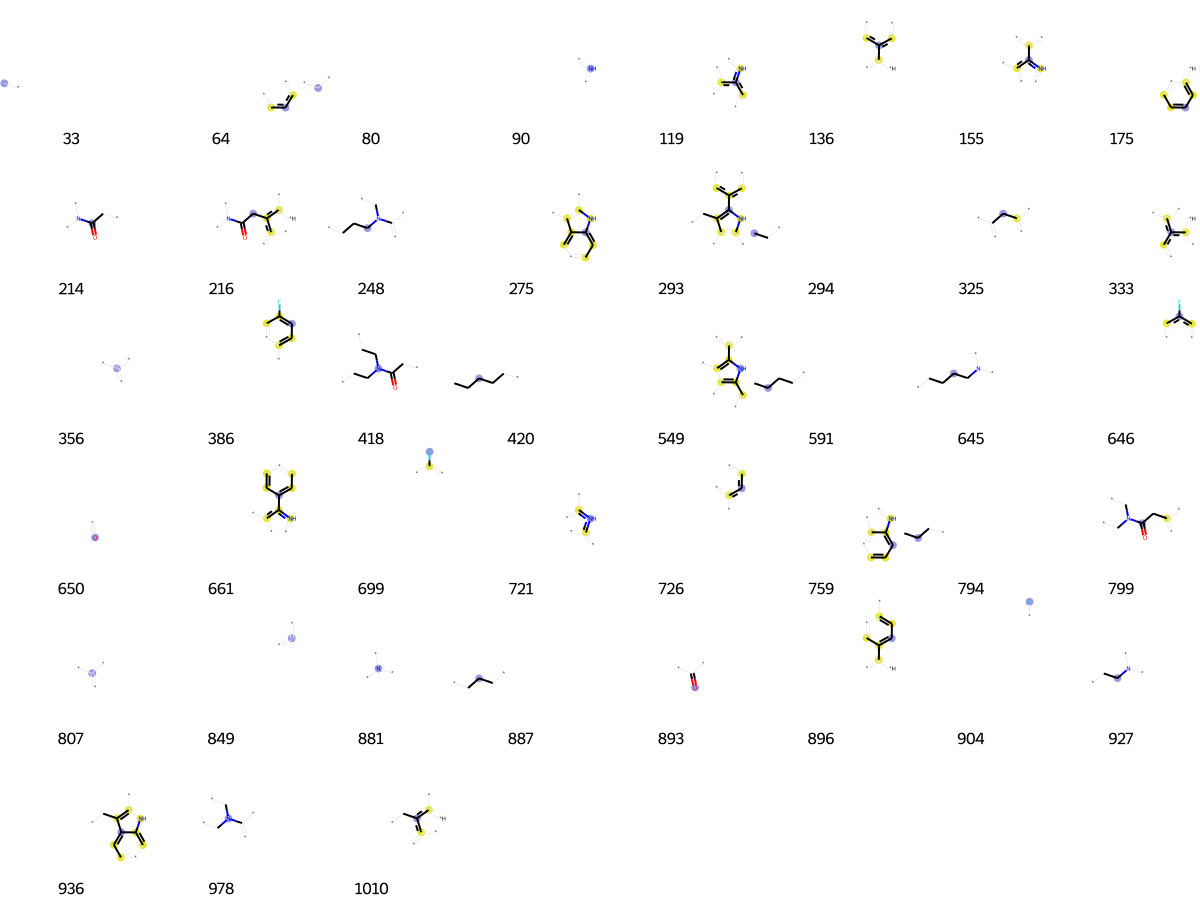

In [1034]:
prints = [(M25, x, bi) for x in fp25.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp25.GetOnBits ()])

In [1035]:
bi = {}

fp26= AllChem.GetMorganFingerprintAsBitVect(M26, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp26, fp_arr)
np.nonzero(fp_arr)
list(fp26.GetOnBits())

[36,
 64,
 74,
 90,
 95,
 102,
 129,
 142,
 165,
 175,
 216,
 219,
 284,
 305,
 352,
 356,
 378,
 407,
 440,
 446,
 452,
 456,
 492,
 561,
 588,
 659,
 726,
 804,
 816,
 849,
 875,
 880,
 883,
 926,
 927,
 935,
 955,
 958,
 984,
 996]

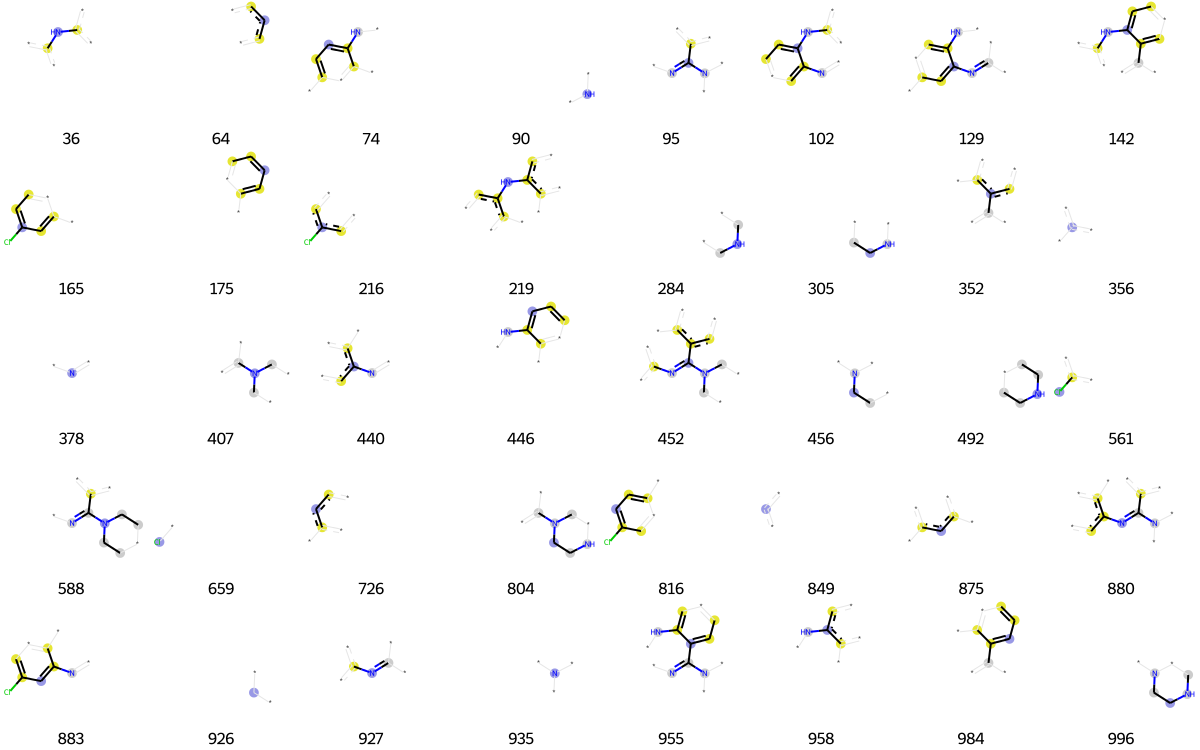

In [1036]:
prints = [(M26, x, bi) for x in fp26.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp26.GetOnBits ()])

In [1037]:
bi = {}

fp27= AllChem.GetMorganFingerprintAsBitVect(M27, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp27, fp_arr)
np.nonzero(fp_arr)
list(fp27.GetOnBits())

[14,
 30,
 33,
 64,
 95,
 121,
 165,
 175,
 207,
 212,
 216,
 352,
 356,
 378,
 397,
 407,
 440,
 452,
 456,
 473,
 484,
 561,
 588,
 659,
 675,
 704,
 726,
 744,
 816,
 843,
 849,
 875,
 880,
 926,
 927,
 935,
 944,
 949,
 1020]

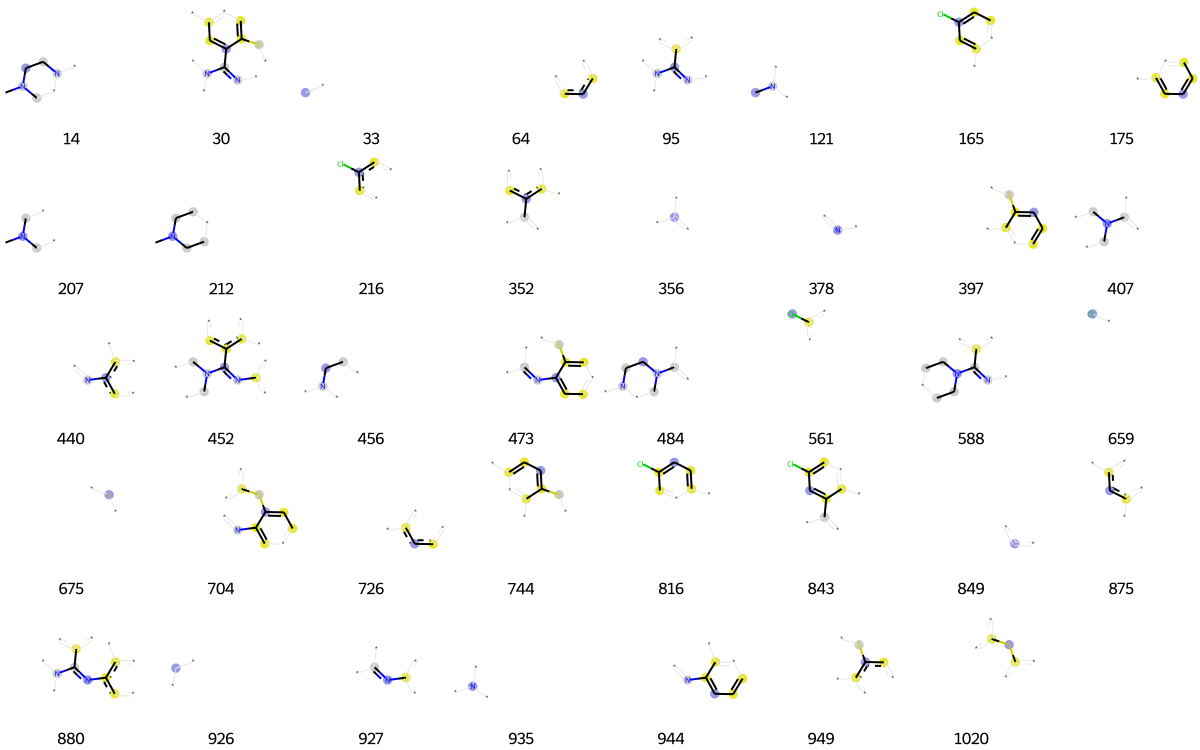

In [1038]:
prints = [(M27, x, bi) for x in fp27.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp27.GetOnBits ()])

In [1039]:
bi = {}

fp28= AllChem.GetMorganFingerprintAsBitVect(M28, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp28, fp_arr)
np.nonzero(fp_arr)
list(fp28.GetOnBits())

[8,
 32,
 33,
 36,
 39,
 80,
 90,
 102,
 112,
 119,
 201,
 218,
 231,
 250,
 255,
 271,
 294,
 301,
 305,
 314,
 325,
 333,
 335,
 352,
 356,
 360,
 379,
 381,
 407,
 417,
 440,
 452,
 456,
 523,
 558,
 625,
 650,
 656,
 674,
 709,
 721,
 723,
 726,
 775,
 790,
 793,
 799,
 830,
 839,
 847,
 849,
 852,
 857,
 875,
 886,
 926,
 930,
 935,
 938,
 950,
 951,
 956,
 973,
 990,
 1019]

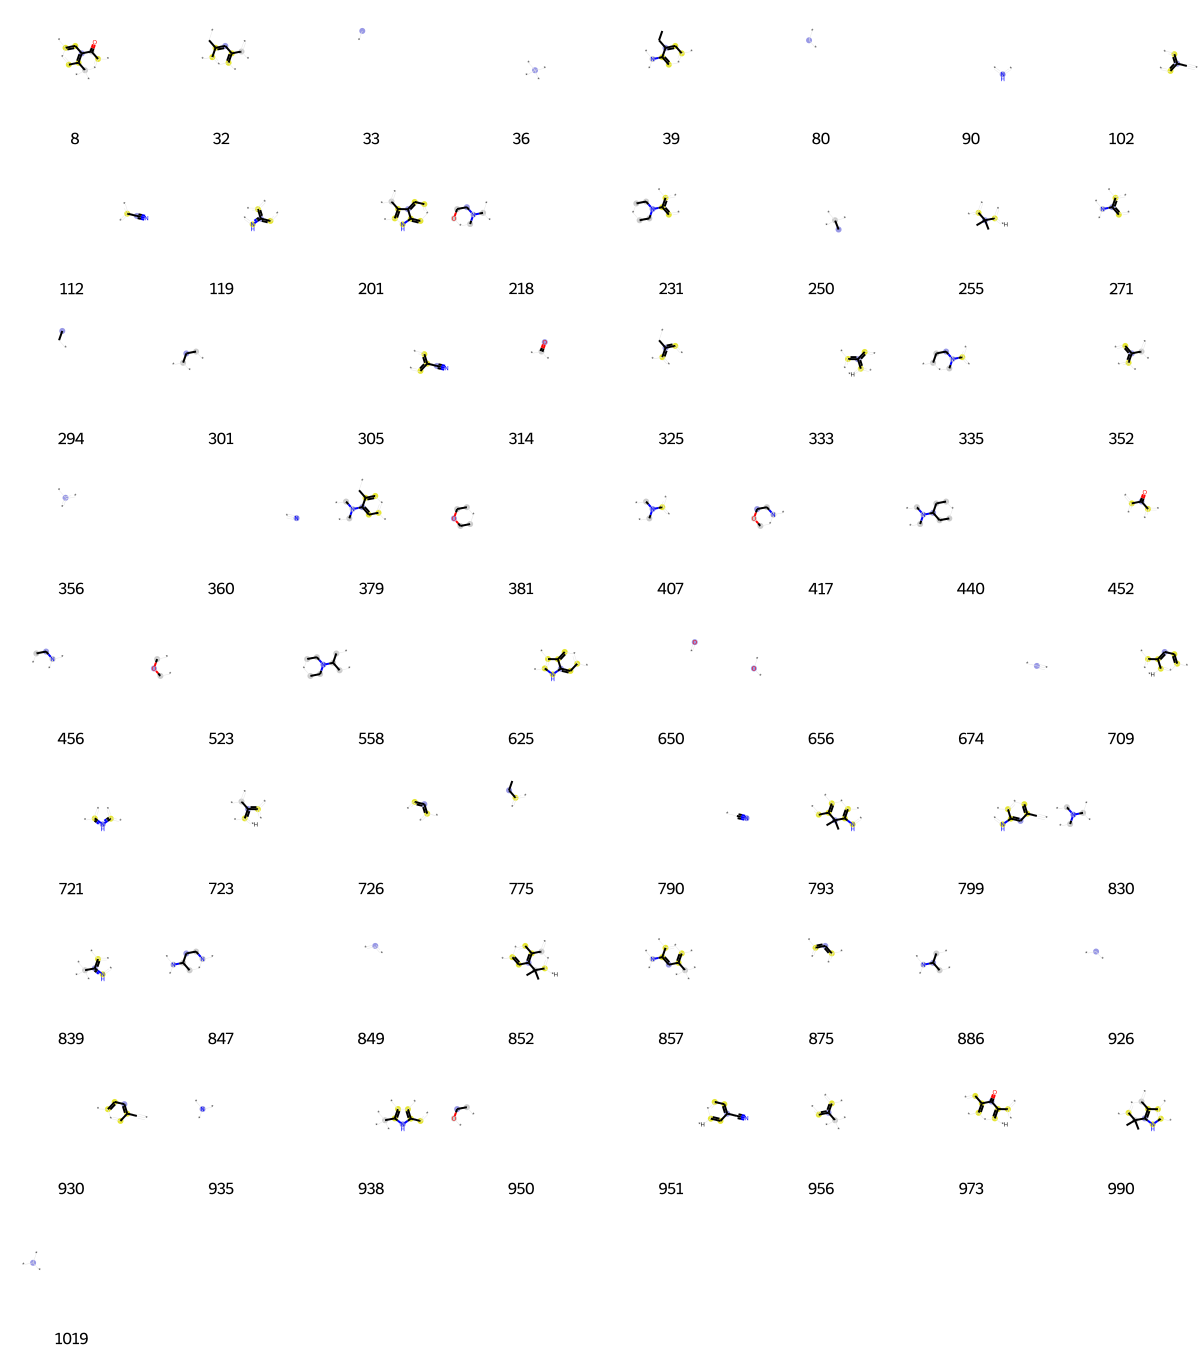

In [1040]:
prints = [(M28, x, bi) for x in fp28.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp28.GetOnBits ()])

In [1041]:
bi = {}

fp29= AllChem.GetMorganFingerprintAsBitVect(M29, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp29, fp_arr)
np.nonzero(fp_arr)
list(fp29.GetOnBits())

[1,
 33,
 40,
 94,
 157,
 167,
 231,
 249,
 255,
 314,
 356,
 363,
 373,
 457,
 487,
 512,
 513,
 578,
 583,
 585,
 590,
 648,
 650,
 656,
 695,
 723,
 726,
 745,
 750,
 751,
 779,
 807,
 841,
 849,
 875,
 881,
 926,
 933,
 946,
 965,
 1011,
 1019]

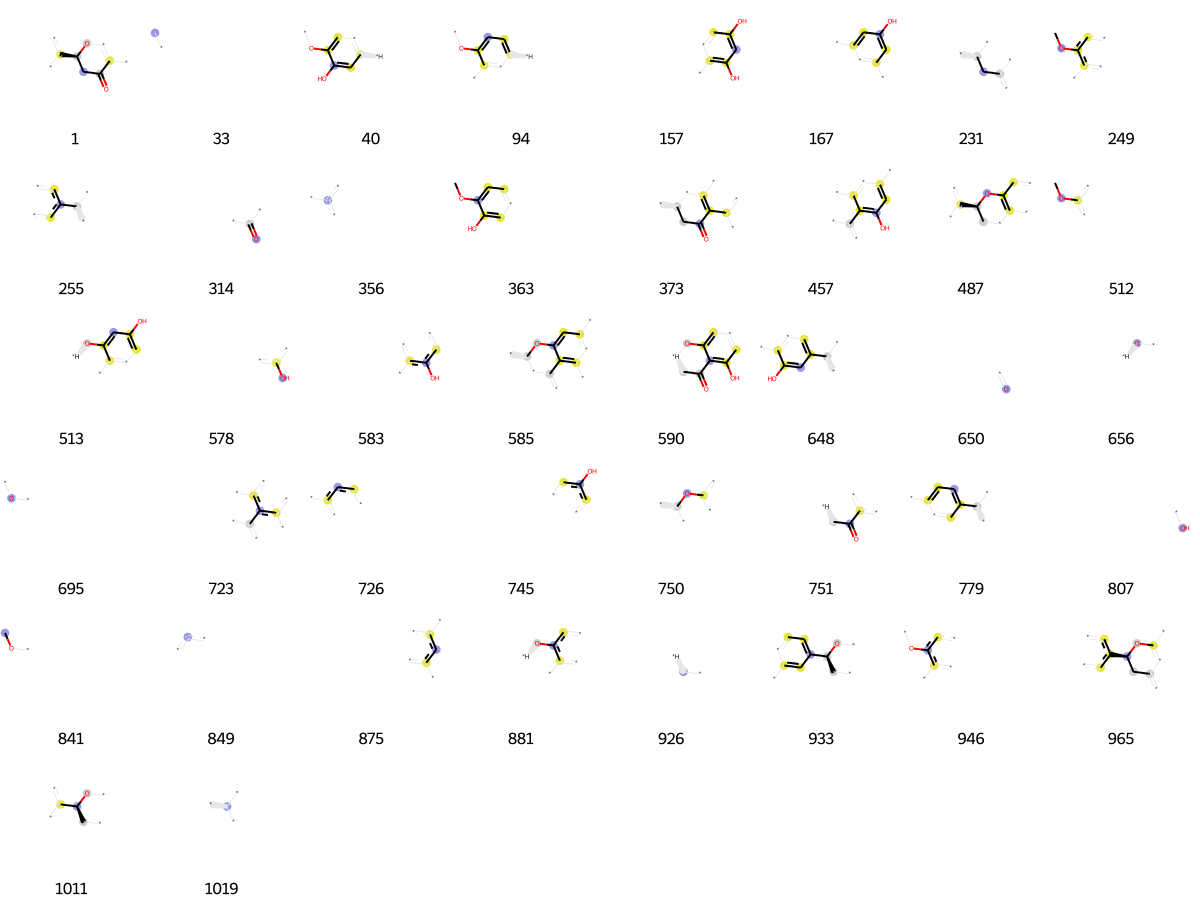

In [1042]:
prints = [(M29, x, bi) for x in fp29.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp29.GetOnBits ()])

In [1043]:
bi = {}

fp30= AllChem.GetMorganFingerprintAsBitVect(M30, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp30, fp_arr)
np.nonzero(fp_arr)
list(fp30.GetOnBits())

[15,
 64,
 131,
 175,
 201,
 233,
 356,
 378,
 428,
 448,
 626,
 726,
 827,
 831,
 842,
 849,
 961,
 980]

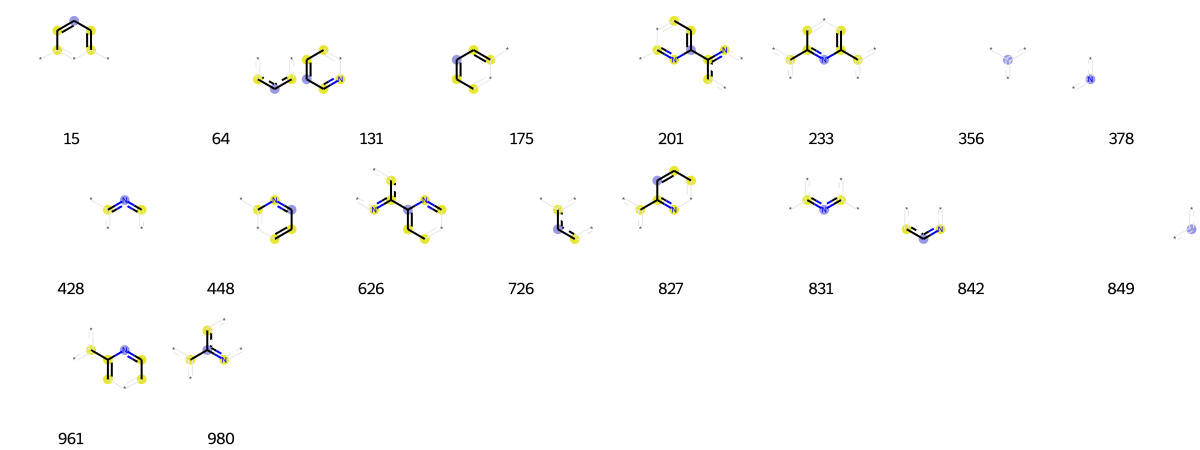

In [1044]:
prints = [(M30, x, bi) for x in fp30.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp30.GetOnBits ()])

In [1045]:
bi = {}

fp31= AllChem.GetMorganFingerprintAsBitVect(M31, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp31, fp_arr)
np.nonzero(fp_arr)
list(fp31.GetOnBits())

[3,
 36,
 64,
 90,
 175,
 197,
 199,
 212,
 298,
 301,
 356,
 364,
 371,
 389,
 429,
 431,
 483,
 488,
 489,
 514,
 578,
 583,
 589,
 636,
 684,
 713,
 714,
 726,
 735,
 807,
 849,
 875,
 895,
 896,
 926,
 1019]

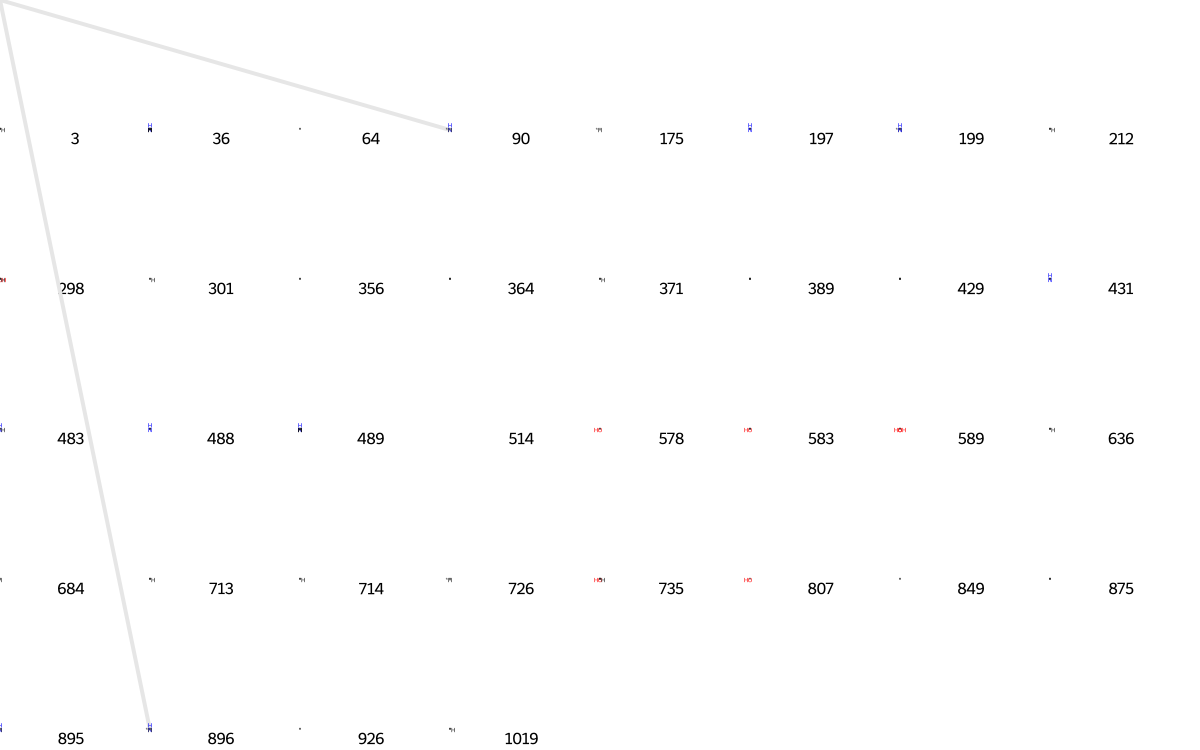

In [1046]:
prints = [(M31, x, bi) for x in fp31.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp31.GetOnBits ()])

In [1047]:
bi = {}

fp32= AllChem.GetMorganFingerprintAsBitVect(M32, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp32, fp_arr)
np.nonzero(fp_arr)
list(fp32.GetOnBits())

[29,
 33,
 80,
 89,
 92,
 134,
 136,
 140,
 147,
 223,
 249,
 255,
 301,
 309,
 323,
 345,
 356,
 378,
 380,
 389,
 427,
 471,
 490,
 510,
 588,
 622,
 647,
 650,
 689,
 698,
 713,
 722,
 726,
 779,
 797,
 807,
 831,
 849,
 893,
 896,
 926,
 976,
 1004,
 1019]

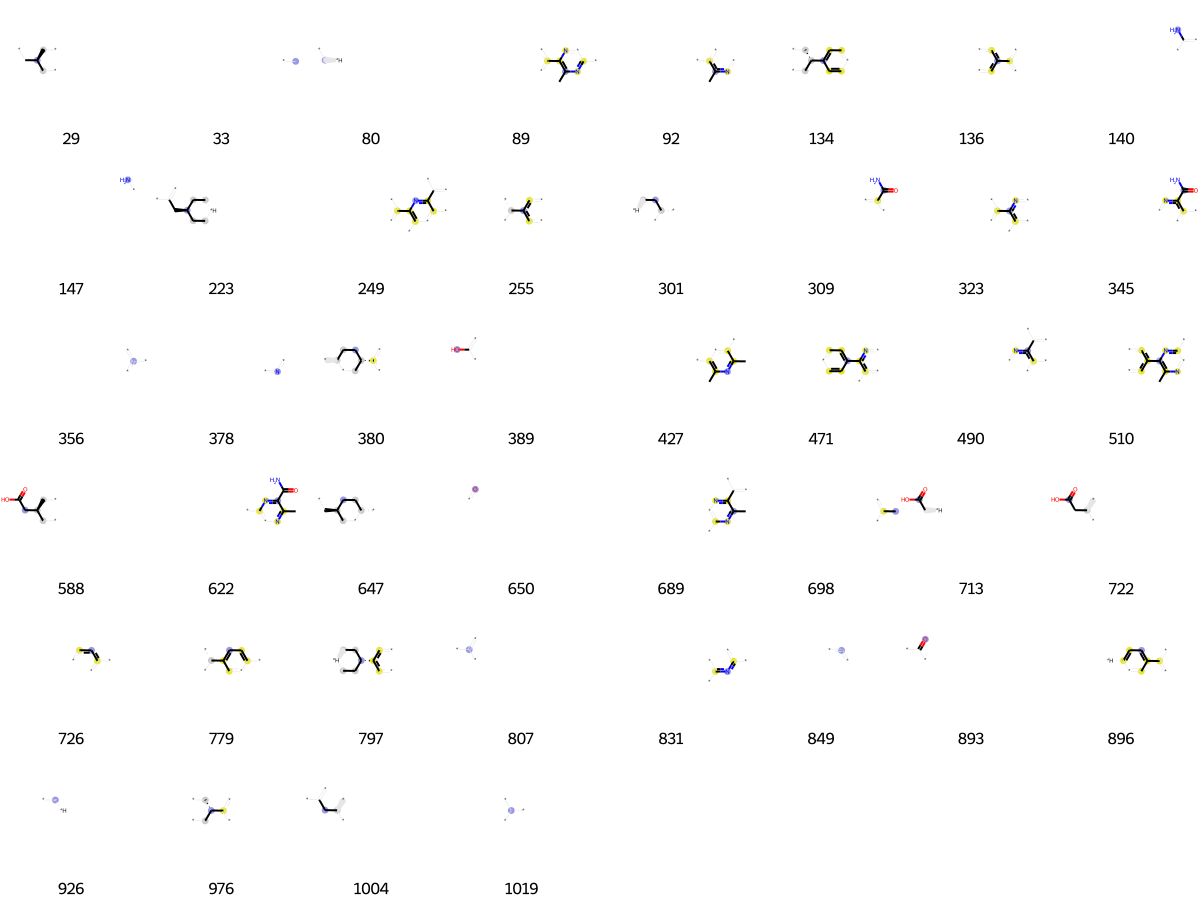

In [1048]:
prints = [(M32, x, bi) for x in fp32.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp32.GetOnBits ()])

In [1049]:
bi = {}

fp33= AllChem.GetMorganFingerprintAsBitVect(M33, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp33, fp_arr)
np.nonzero(fp_arr)
list(fp33.GetOnBits())

[39,
 42,
 64,
 80,
 136,
 147,
 150,
 175,
 228,
 240,
 242,
 310,
 356,
 378,
 389,
 406,
 433,
 543,
 552,
 675,
 726,
 730,
 819,
 831,
 845,
 849,
 896,
 947,
 980]

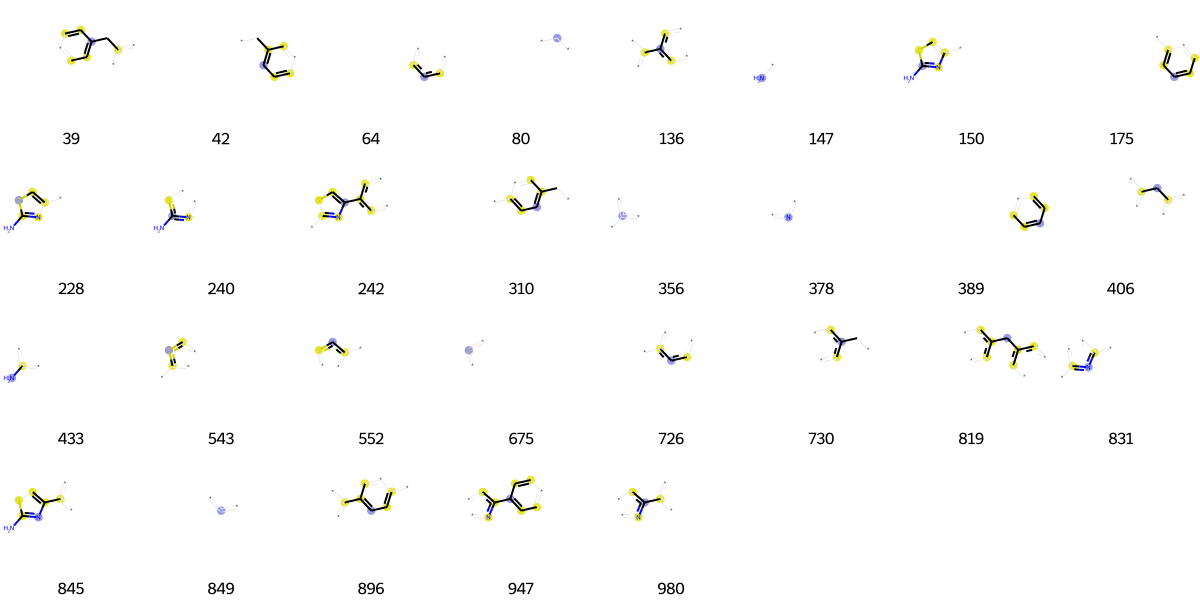

In [1050]:
prints = [(M33, x, bi) for x in fp33.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp33.GetOnBits ()])

In [1051]:
bi = {}

fp34= AllChem.GetMorganFingerprintAsBitVect(M34, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp34, fp_arr)
np.nonzero(fp_arr)
list(fp34.GetOnBits())

[15,
 30,
 33,
 36,
 64,
 80,
 106,
 108,
 111,
 117,
 121,
 136,
 139,
 140,
 147,
 149,
 152,
 171,
 192,
 193,
 196,
 206,
 233,
 250,
 251,
 258,
 268,
 278,
 285,
 294,
 299,
 311,
 314,
 317,
 327,
 334,
 349,
 356,
 357,
 378,
 380,
 394,
 399,
 426,
 430,
 431,
 433,
 438,
 447,
 463,
 464,
 467,
 474,
 496,
 511,
 560,
 568,
 605,
 608,
 611,
 644,
 647,
 650,
 656,
 665,
 679,
 695,
 726,
 731,
 736,
 747,
 750,
 751,
 754,
 759,
 781,
 806,
 807,
 841,
 849,
 869,
 875,
 879,
 881,
 886,
 887,
 888,
 893,
 897,
 904,
 926,
 935,
 960,
 967,
 978,
 980,
 1019]

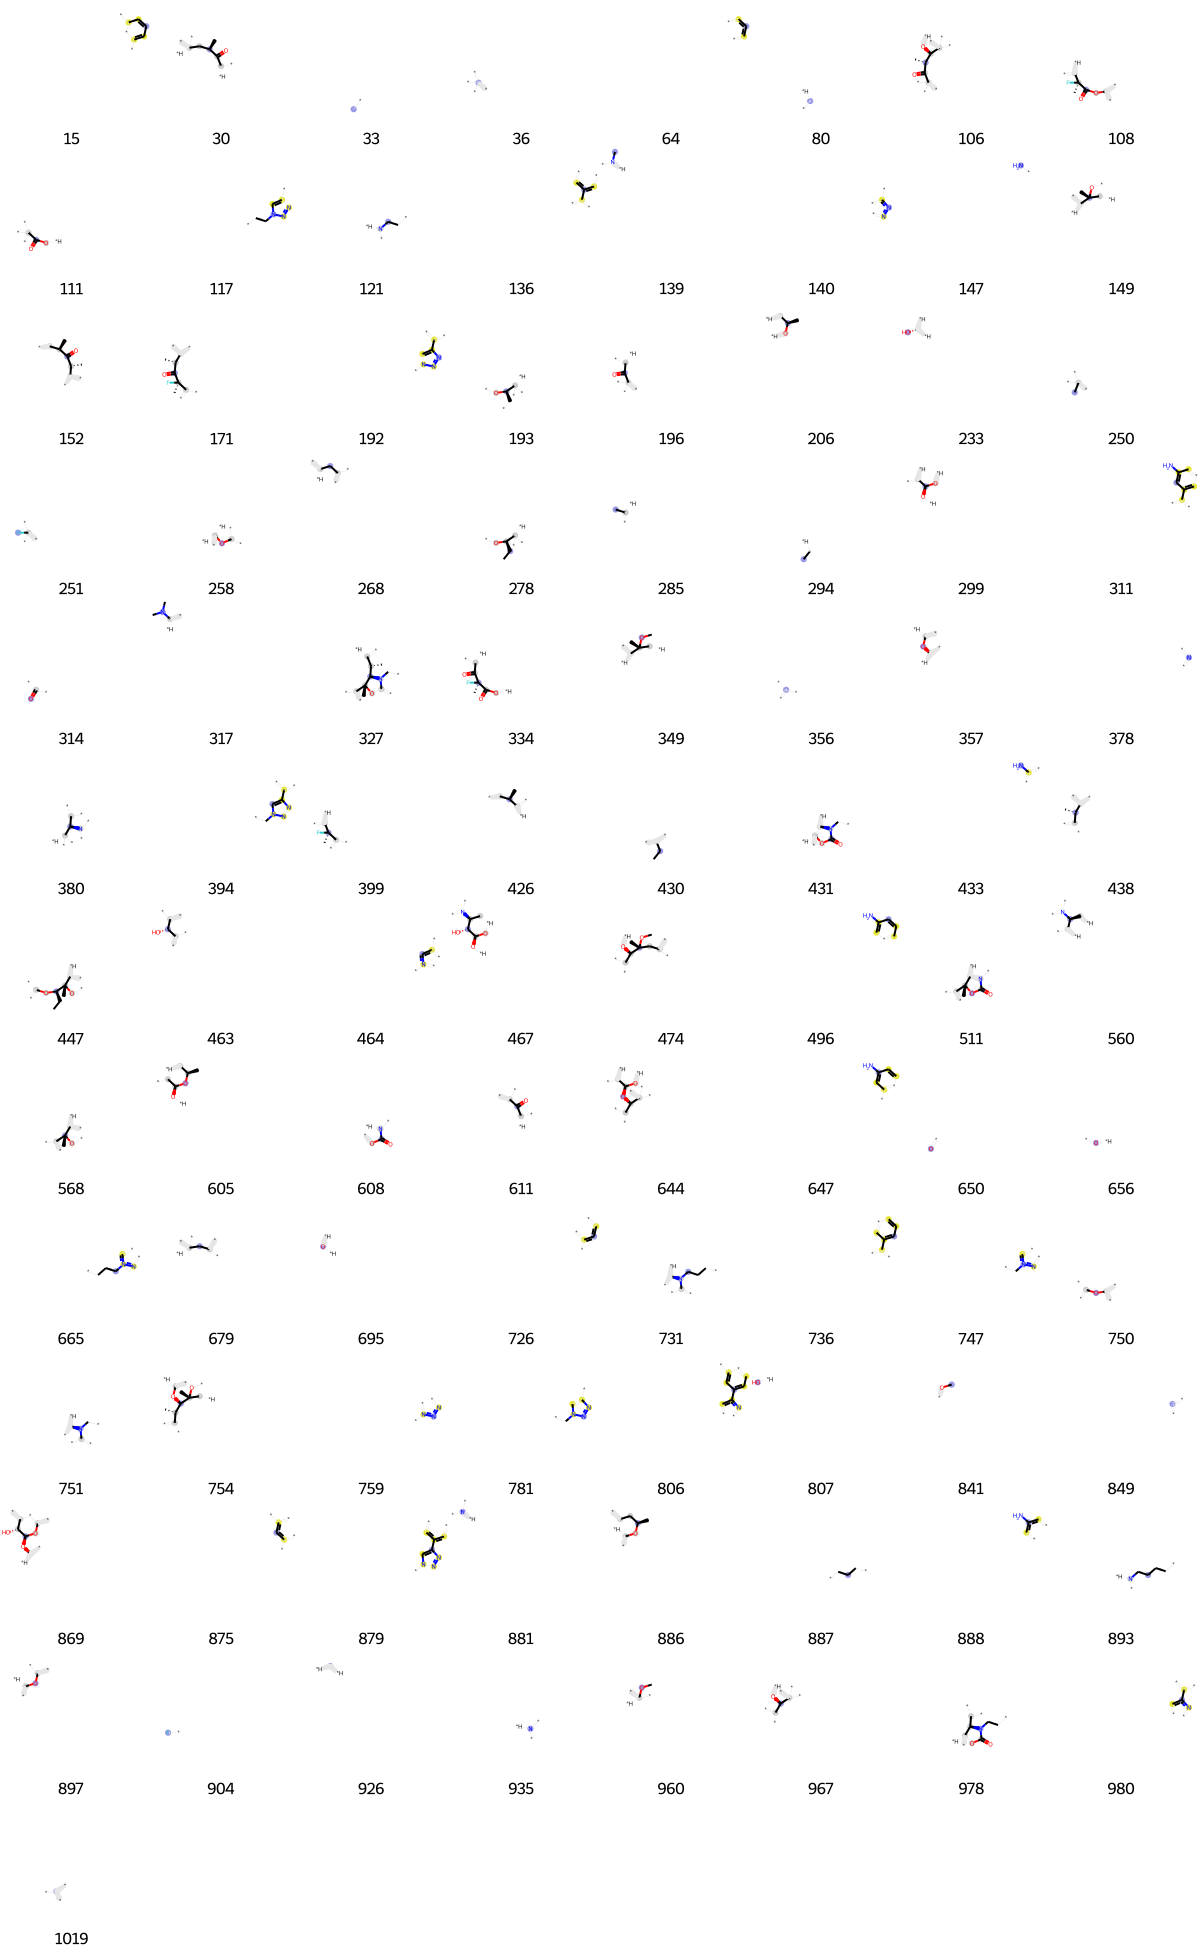

In [1052]:
prints = [(M34, x, bi) for x in fp34.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp34.GetOnBits ()])

In [1053]:
bi = {}

fp35= AllChem.GetMorganFingerprintAsBitVect(M35, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp35, fp_arr)
np.nonzero(fp_arr)
list(fp35.GetOnBits())

[64,
 90,
 104,
 175,
 274,
 314,
 333,
 356,
 368,
 533,
 549,
 580,
 650,
 656,
 721,
 726,
 750,
 784,
 849,
 878,
 986,
 1002]

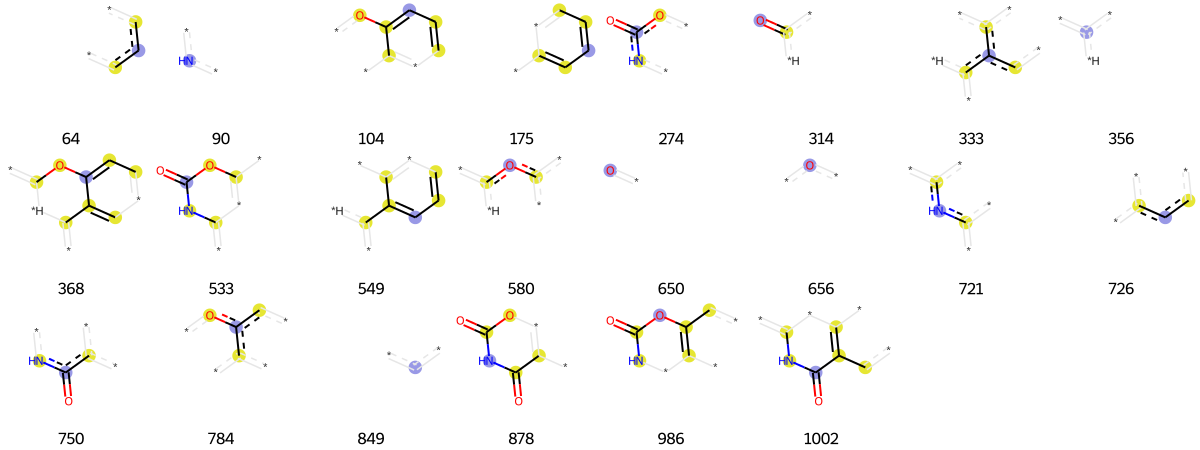

In [1054]:
prints = [(M35, x, bi) for x in fp35.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp35.GetOnBits ()])

In [1055]:
bi = {}

fp36= AllChem.GetMorganFingerprintAsBitVect(M36, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp36, fp_arr)
np.nonzero(fp_arr)
list(fp36.GetOnBits())

[34,
 75,
 78,
 80,
 102,
 112,
 128,
 147,
 152,
 157,
 179,
 205,
 209,
 233,
 244,
 255,
 305,
 310,
 356,
 360,
 366,
 378,
 392,
 394,
 428,
 433,
 435,
 454,
 455,
 463,
 472,
 488,
 489,
 530,
 537,
 548,
 561,
 610,
 614,
 656,
 659,
 666,
 672,
 674,
 695,
 700,
 726,
 730,
 745,
 755,
 786,
 790,
 807,
 820,
 831,
 841,
 849,
 854,
 875,
 897,
 930,
 935,
 950,
 962,
 968,
 980,
 1018,
 1019]

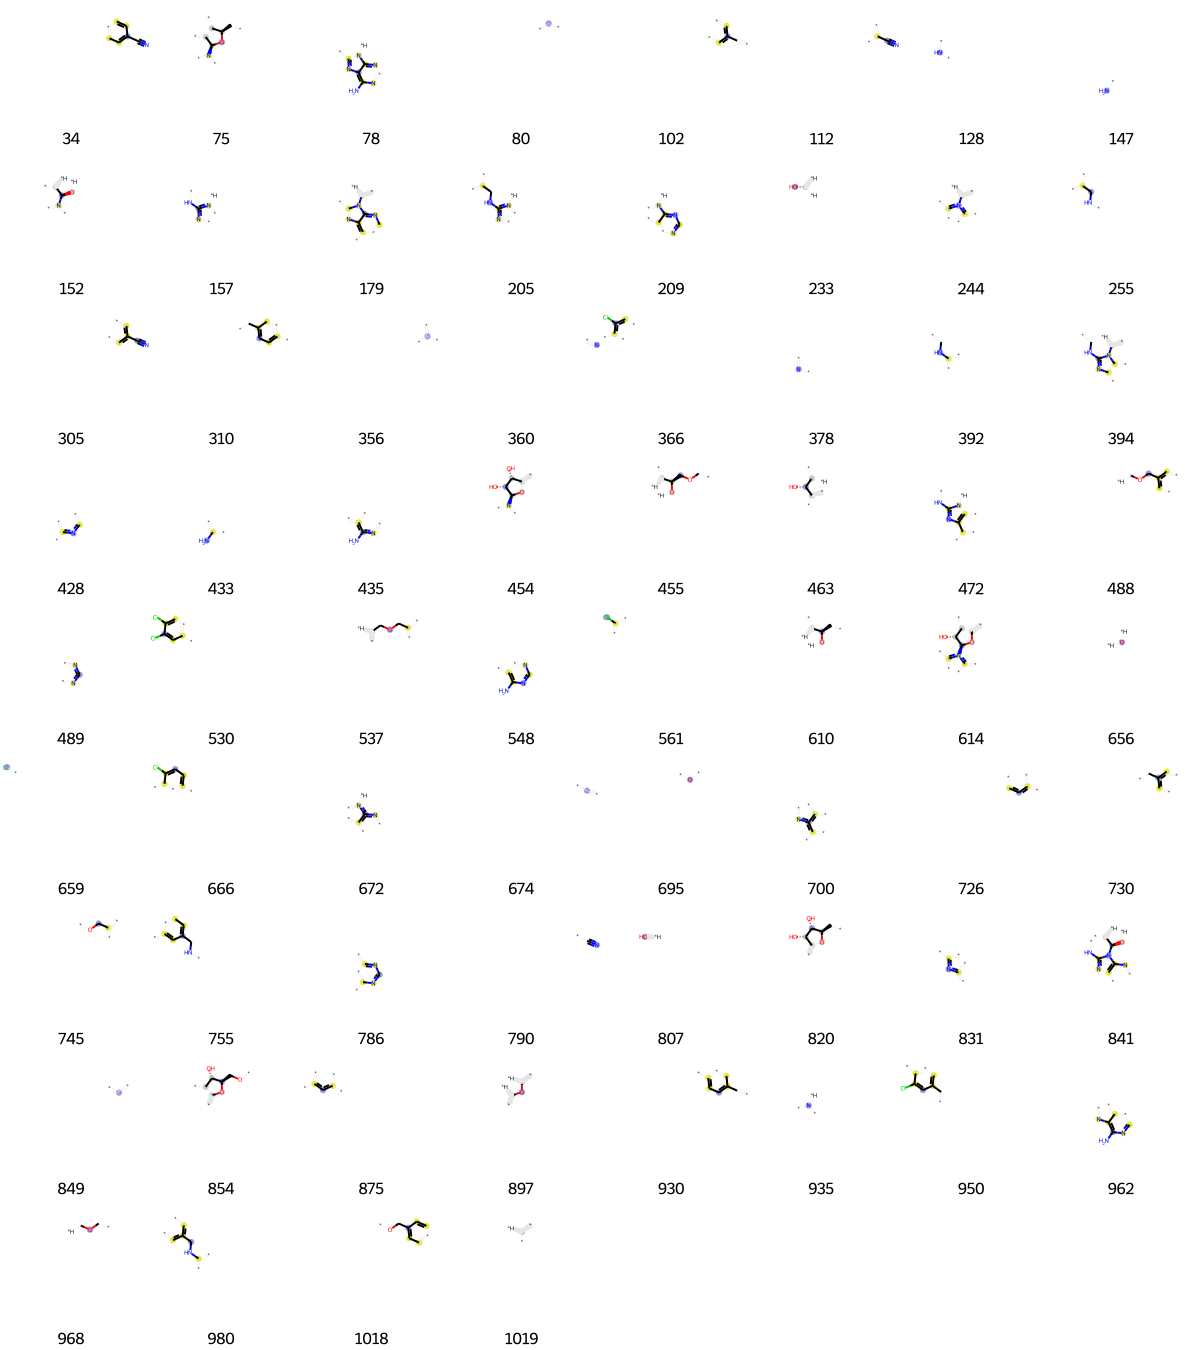

In [1056]:
prints = [(M36, x, bi) for x in fp36.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp36.GetOnBits ()])

In [1057]:
bi = {}

fp37= AllChem.GetMorganFingerprintAsBitVect(M37, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp37, fp_arr)
np.nonzero(fp_arr)
list(fp37.GetOnBits())

[12,
 33,
 36,
 46,
 111,
 114,
 130,
 134,
 149,
 154,
 157,
 158,
 190,
 221,
 250,
 314,
 332,
 356,
 377,
 392,
 479,
 497,
 580,
 650,
 656,
 673,
 674,
 679,
 682,
 706,
 748,
 750,
 787,
 803,
 807,
 876,
 884,
 926,
 941,
 1004,
 1019]

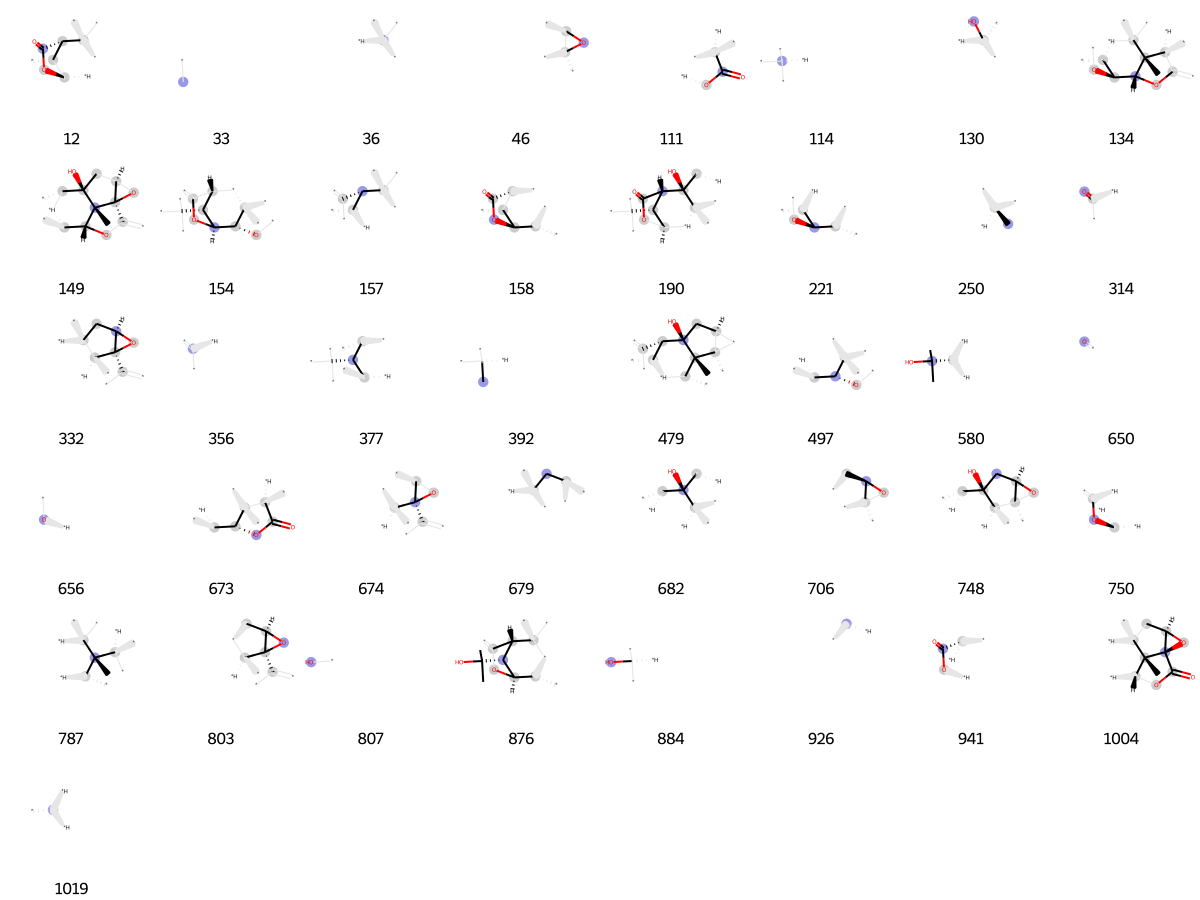

In [1058]:
prints = [(M37, x, bi) for x in fp37.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp37.GetOnBits ()])

In [1059]:
bi = {}

fp38= AllChem.GetMorganFingerprintAsBitVect(M38, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp38, fp_arr)
np.nonzero(fp_arr)
list(fp38.GetOnBits())

[59,
 114,
 207,
 374,
 389,
 429,
 475,
 617,
 650,
 805,
 807,
 886,
 893,
 904,
 916,
 953,
 972]

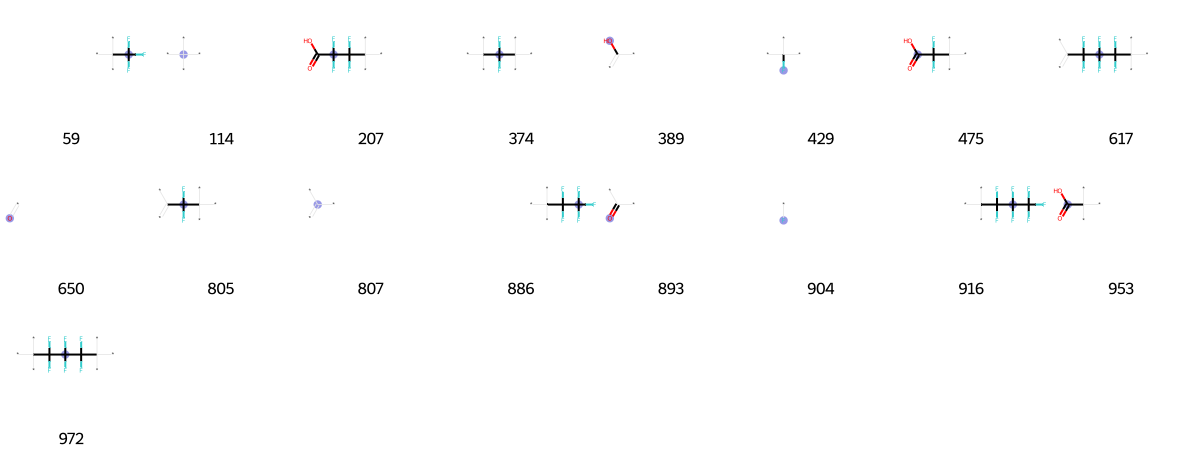

In [1060]:
prints = [(M38, x, bi) for x in fp38.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp38.GetOnBits ()])

In [1061]:
bi = {}

fp39= AllChem.GetMorganFingerprintAsBitVect(M39, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp39, fp_arr)
np.nonzero(fp_arr)
list(fp3.GetOnBits())

[9,
 71,
 75,
 80,
 147,
 152,
 194,
 209,
 210,
 222,
 229,
 233,
 356,
 378,
 428,
 433,
 435,
 454,
 463,
 489,
 492,
 519,
 548,
 577,
 610,
 656,
 672,
 700,
 740,
 786,
 807,
 820,
 849,
 897,
 932,
 935,
 962,
 1019]

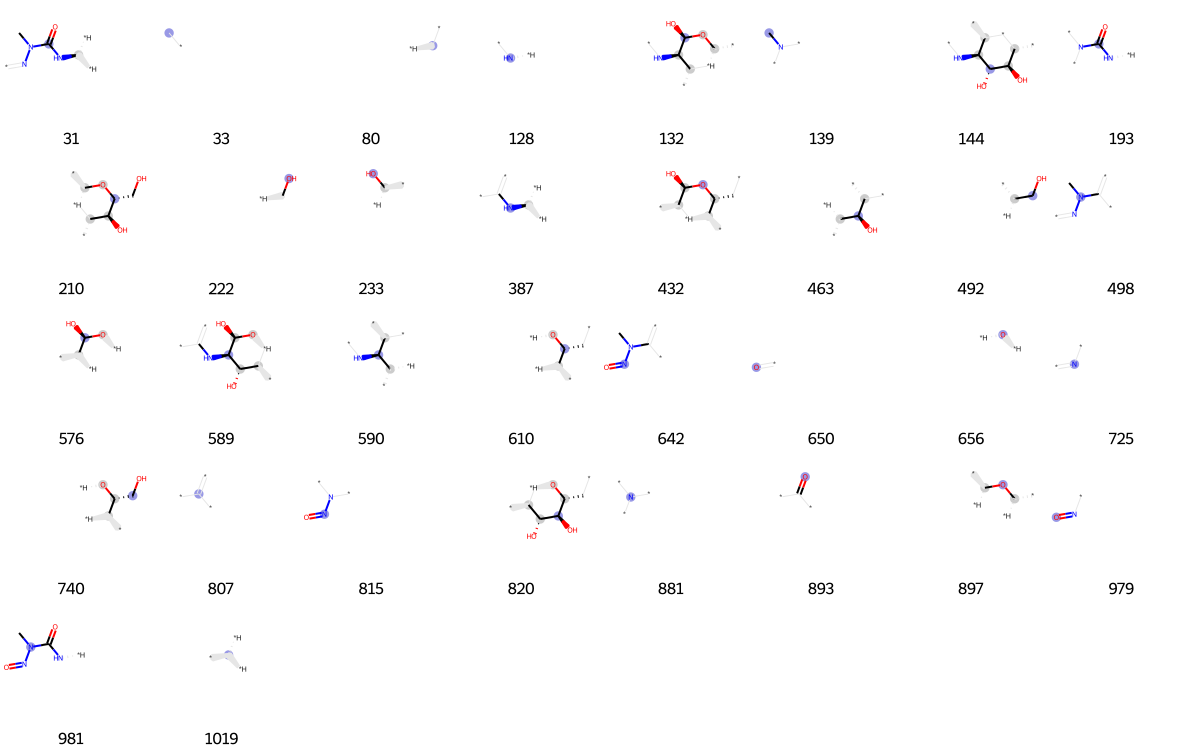

In [1062]:
prints = [(M39, x, bi) for x in fp39.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp39.GetOnBits ()])

In [1063]:
bi = {}

fp40= AllChem.GetMorganFingerprintAsBitVect(M40, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp40, fp_arr)
np.nonzero(fp_arr)
list(fp40.GetOnBits())

[13,
 33,
 39,
 48,
 64,
 69,
 80,
 102,
 210,
 214,
 222,
 233,
 237,
 255,
 294,
 295,
 310,
 322,
 325,
 356,
 366,
 406,
 428,
 463,
 492,
 561,
 610,
 656,
 659,
 666,
 670,
 695,
 700,
 718,
 726,
 730,
 740,
 779,
 807,
 820,
 849,
 858,
 875,
 897,
 914,
 975,
 1019]

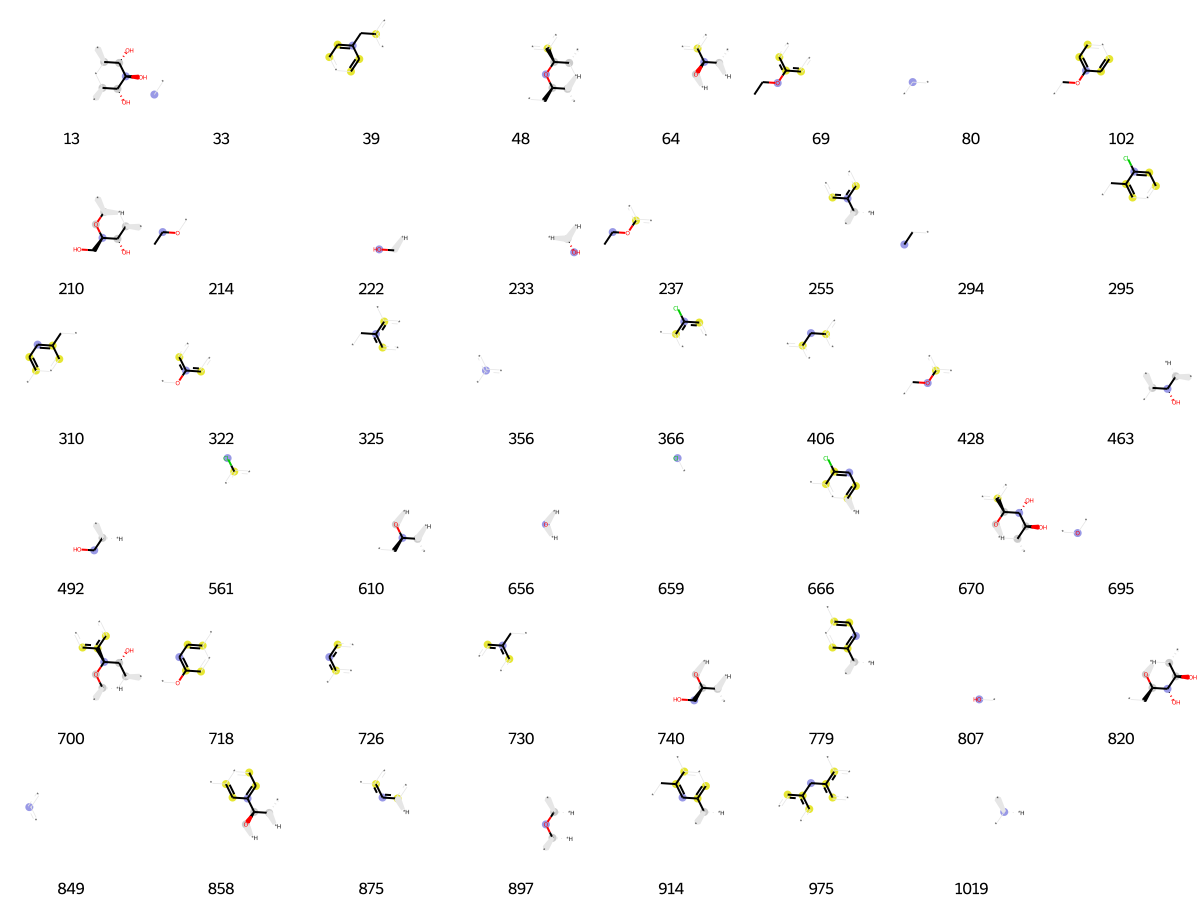

In [1064]:
prints = [(M40, x, bi) for x in fp40.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp40.GetOnBits ()])

In [1065]:
bi = {}

fp41= AllChem.GetMorganFingerprintAsBitVect(M41, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp41, fp_arr)
np.nonzero(fp_arr)
list(fp41.GetOnBits())

[3,
 4,
 15,
 33,
 36,
 49,
 80,
 85,
 105,
 116,
 118,
 138,
 189,
 192,
 212,
 239,
 249,
 250,
 253,
 289,
 293,
 301,
 313,
 322,
 356,
 408,
 432,
 452,
 453,
 455,
 486,
 519,
 555,
 562,
 563,
 593,
 612,
 622,
 636,
 643,
 650,
 659,
 675,
 695,
 705,
 713,
 714,
 715,
 718,
 726,
 766,
 781,
 807,
 823,
 849,
 875,
 881,
 893,
 926,
 927,
 978,
 1019]

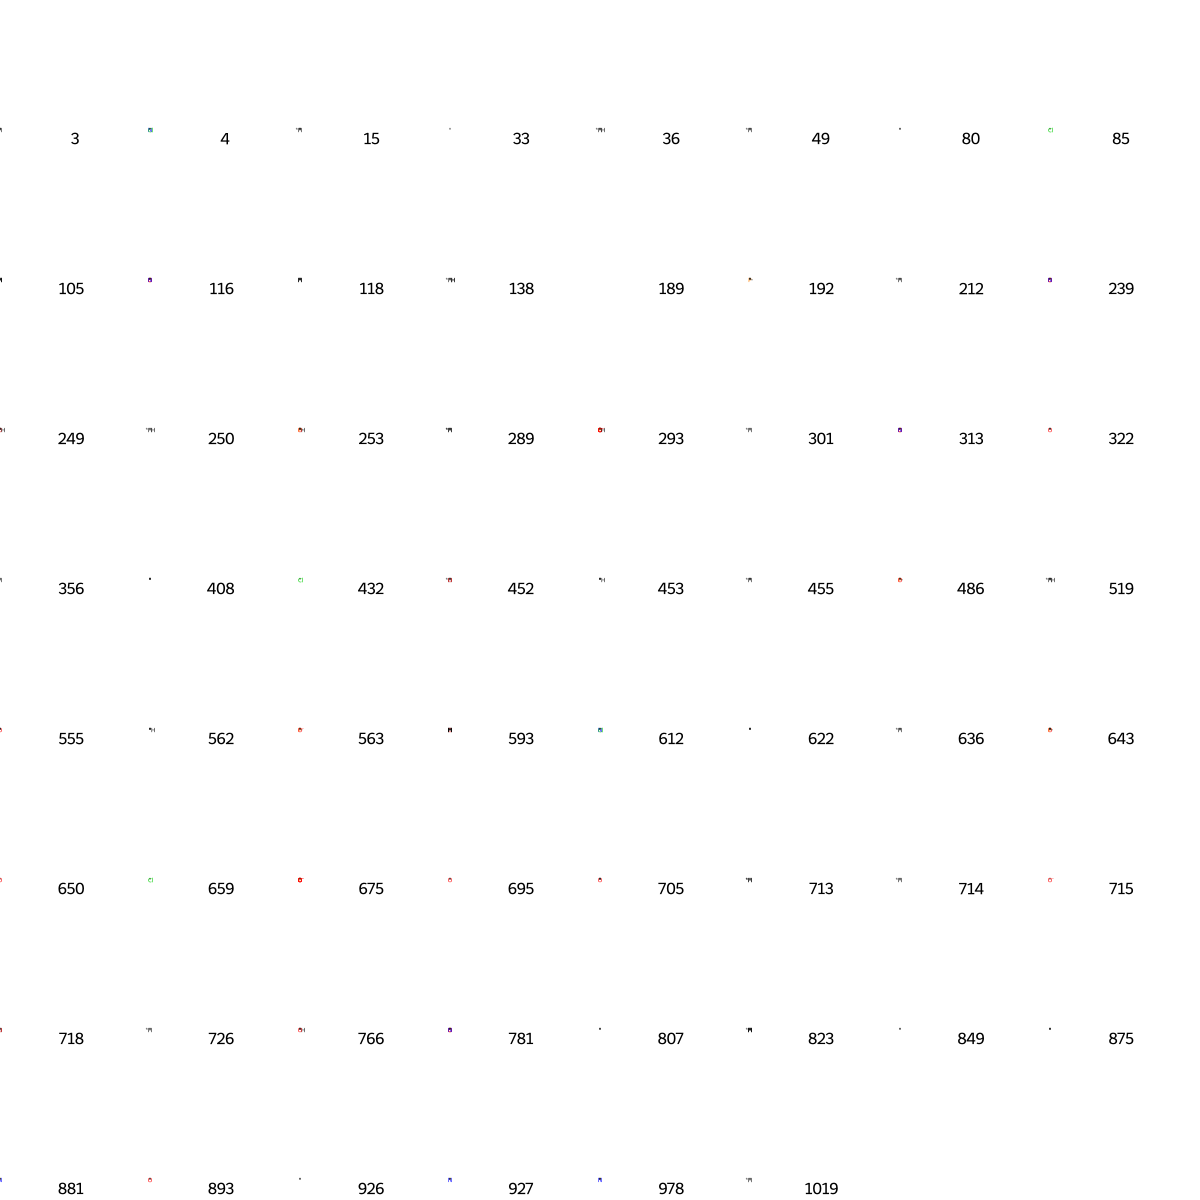

In [1066]:
prints = [(M41, x, bi) for x in fp41.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp41.GetOnBits ()])

In [1067]:
bi = {}

fp42= AllChem.GetMorganFingerprintAsBitVect(M42, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp42, fp_arr)
np.nonzero(fp_arr)
list(fp42.GetOnBits())

[0,
 1,
 33,
 40,
 80,
 102,
 117,
 128,
 140,
 147,
 179,
 186,
 188,
 209,
 233,
 245,
 268,
 285,
 294,
 361,
 375,
 379,
 387,
 389,
 407,
 427,
 442,
 463,
 520,
 525,
 623,
 624,
 650,
 722,
 726,
 806,
 807,
 840,
 893,
 926,
 1017,
 1019]

In [1068]:
bi = {}

fp43= AllChem.GetMorganFingerprintAsBitVect(M43, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp43, fp_arr)
np.nonzero(fp_arr)
list(fp43.GetOnBits())

[36,
 120,
 138,
 147,
 184,
 190,
 226,
 301,
 312,
 389,
 407,
 433,
 578,
 650,
 679,
 738,
 807,
 893,
 926,
 974,
 999,
 1009,
 1019]

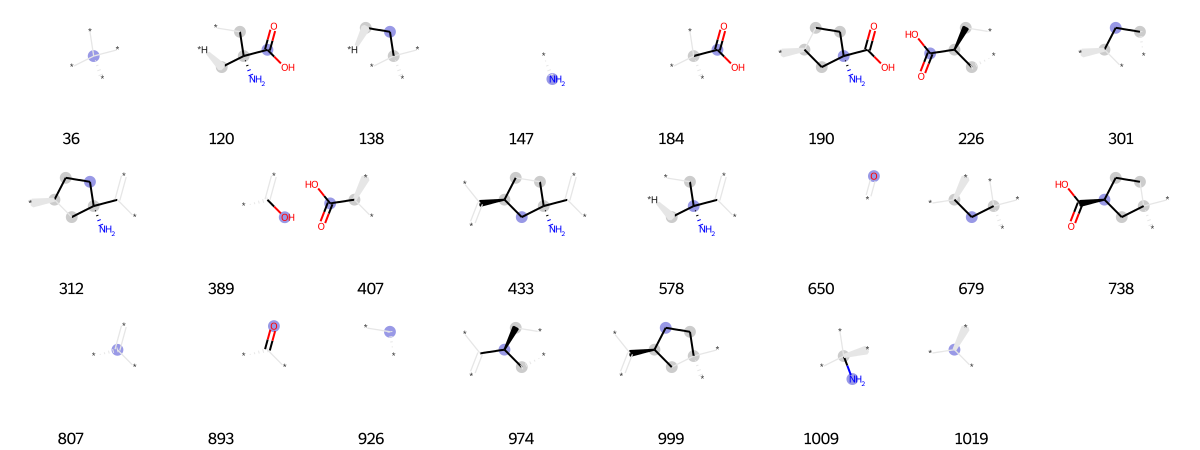

In [1069]:
prints = [(M43, x, bi) for x in fp43.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp43.GetOnBits ()])

In [1070]:
bi = {}

fp44= AllChem.GetMorganFingerprintAsBitVect(M44, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp44, fp_arr)
np.nonzero(fp_arr)
list(fp44.GetOnBits())

[3,
 4,
 10,
 13,
 15,
 64,
 80,
 89,
 102,
 121,
 175,
 212,
 230,
 253,
 255,
 272,
 289,
 301,
 322,
 356,
 364,
 381,
 389,
 398,
 428,
 429,
 455,
 456,
 458,
 533,
 561,
 578,
 581,
 636,
 639,
 695,
 713,
 714,
 718,
 726,
 745,
 767,
 779,
 807,
 808,
 849,
 875,
 926,
 935,
 974,
 1019]

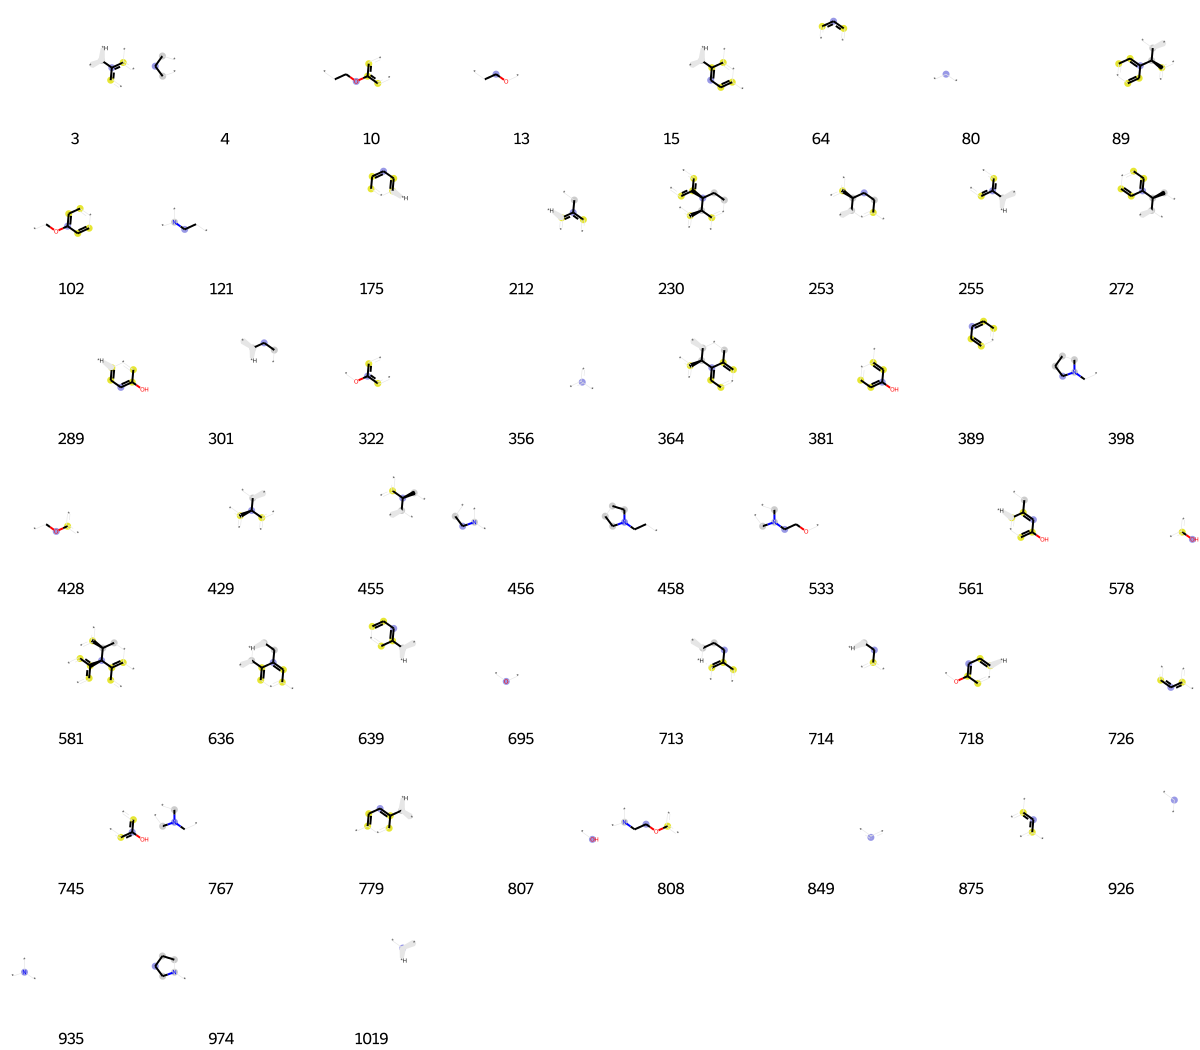

In [1071]:
prints = [(M44, x, bi) for x in fp44.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp44.GetOnBits ()])

In [1072]:
bi = {}

fp45= AllChem.GetMorganFingerprintAsBitVect(M45, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp45, fp_arr)
np.nonzero(fp_arr)
list(fp45.GetOnBits())

[1,
 36,
 51,
 91,
 108,
 122,
 130,
 133,
 134,
 147,
 196,
 251,
 268,
 341,
 360,
 383,
 417,
 422,
 446,
 471,
 472,
 492,
 585,
 642,
 644,
 650,
 651,
 665,
 674,
 679,
 722,
 786,
 790,
 807,
 879,
 888,
 893,
 926,
 935,
 952,
 1003,
 1013,
 1019]

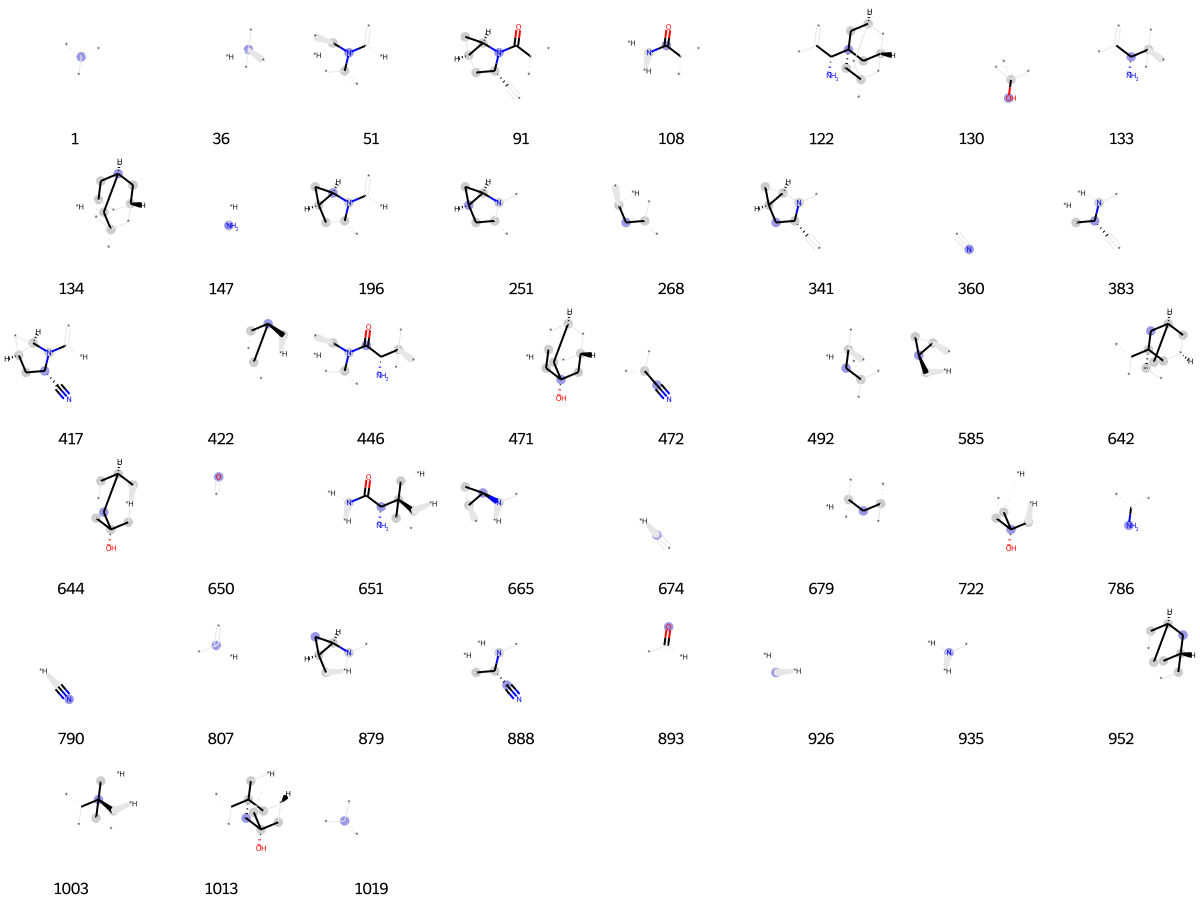

In [1073]:
prints = [(M45, x, bi) for x in fp45.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp45.GetOnBits ()])

In [1074]:
bi = {}

fp46= AllChem.GetMorganFingerprintAsBitVect(M46, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp46, fp_arr)
np.nonzero(fp_arr)
list(fp46.GetOnBits())

[13,
 33,
 80,
 86,
 94,
 139,
 165,
 185,
 212,
 216,
 293,
 356,
 366,
 428,
 494,
 506,
 550,
 559,
 561,
 617,
 659,
 674,
 695,
 726,
 773,
 816,
 849,
 875,
 881,
 887,
 914,
 915,
 927,
 946,
 974,
 991]

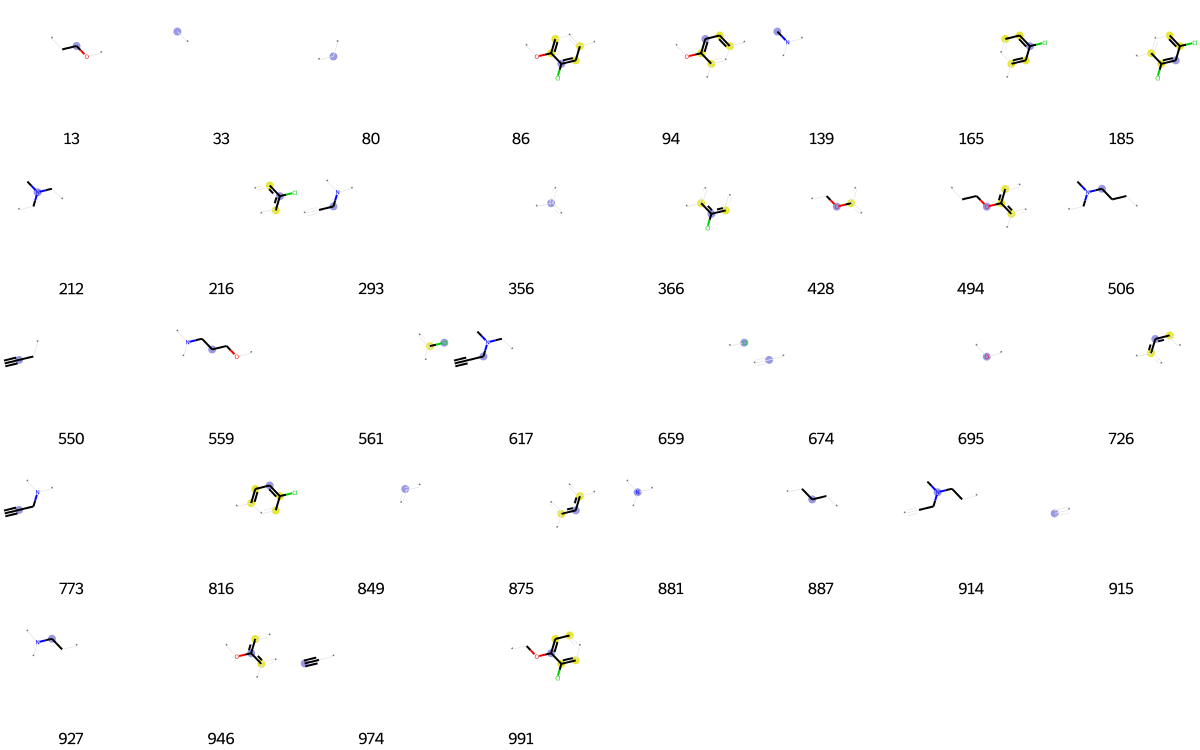

In [1075]:
prints = [(M46, x, bi) for x in fp46.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp46.GetOnBits ()])

In [1076]:
bi = {}

fp47= AllChem.GetMorganFingerprintAsBitVect(M47, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp47, fp_arr)
np.nonzero(fp_arr)
list(fp47.GetOnBits())

[3,
 26,
 33,
 36,
 90,
 119,
 121,
 128,
 179,
 184,
 191,
 207,
 216,
 250,
 276,
 356,
 378,
 386,
 428,
 469,
 486,
 511,
 617,
 623,
 646,
 650,
 659,
 667,
 699,
 720,
 726,
 792,
 807,
 816,
 842,
 843,
 849,
 855,
 858,
 871,
 873,
 875,
 883,
 884,
 893,
 900,
 904,
 919,
 926,
 927,
 935,
 954,
 956,
 958,
 969]

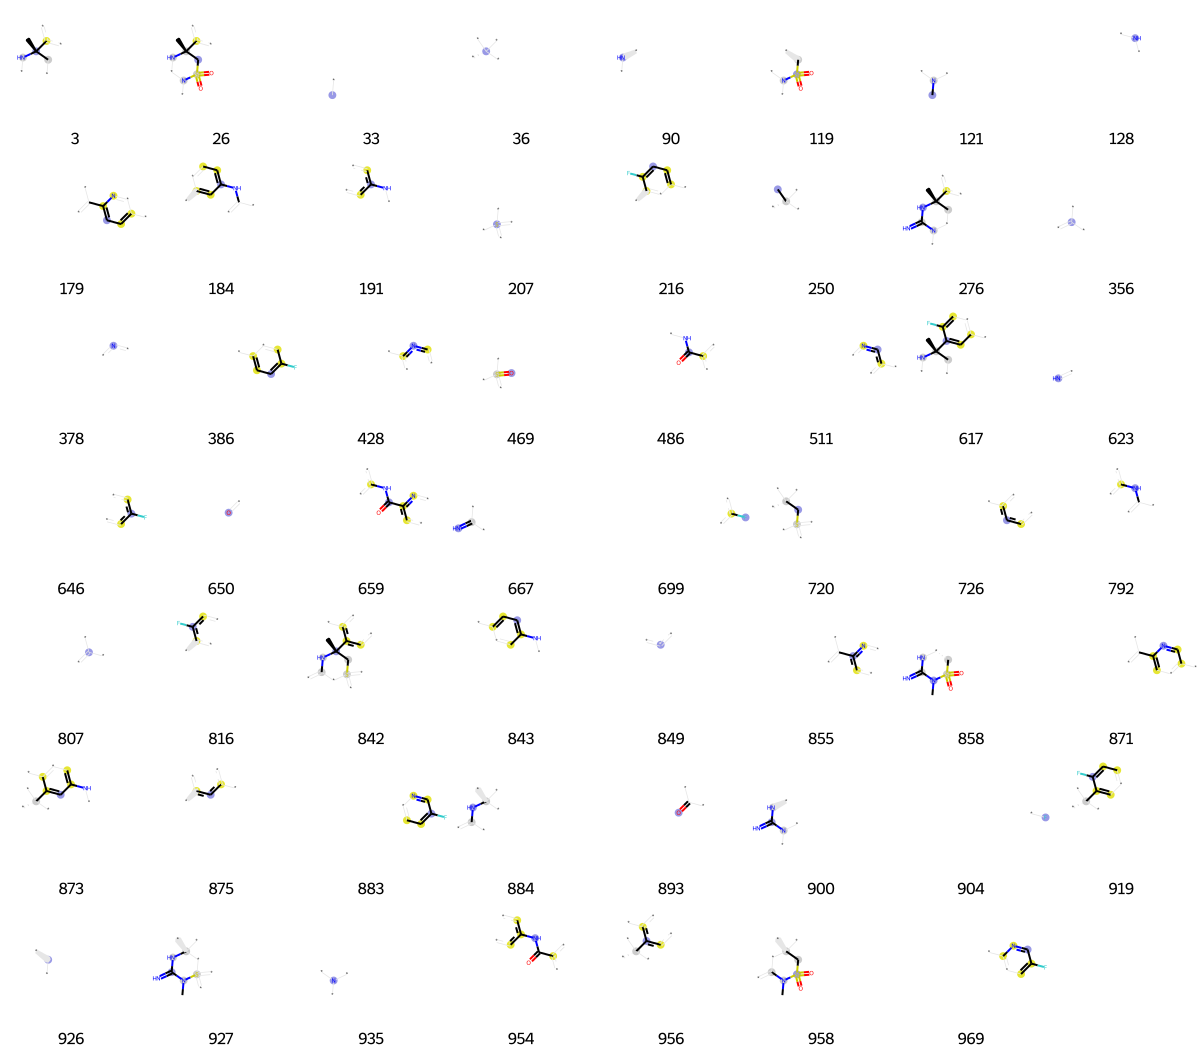

In [1077]:
prints = [(M47, x, bi) for x in fp47.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp47.GetOnBits ()])

In [1078]:
bi = {}

fp48= AllChem.GetMorganFingerprintAsBitVect(M48, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp48, fp_arr)
np.nonzero(fp_arr)
list(fp48.GetOnBits())

[1,
 33,
 64,
 80,
 112,
 128,
 175,
 341,
 348,
 356,
 367,
 386,
 389,
 406,
 538,
 557,
 664,
 667,
 671,
 695,
 698,
 718,
 726,
 737,
 739,
 849,
 887,
 946,
 948,
 971,
 975,
 1014]

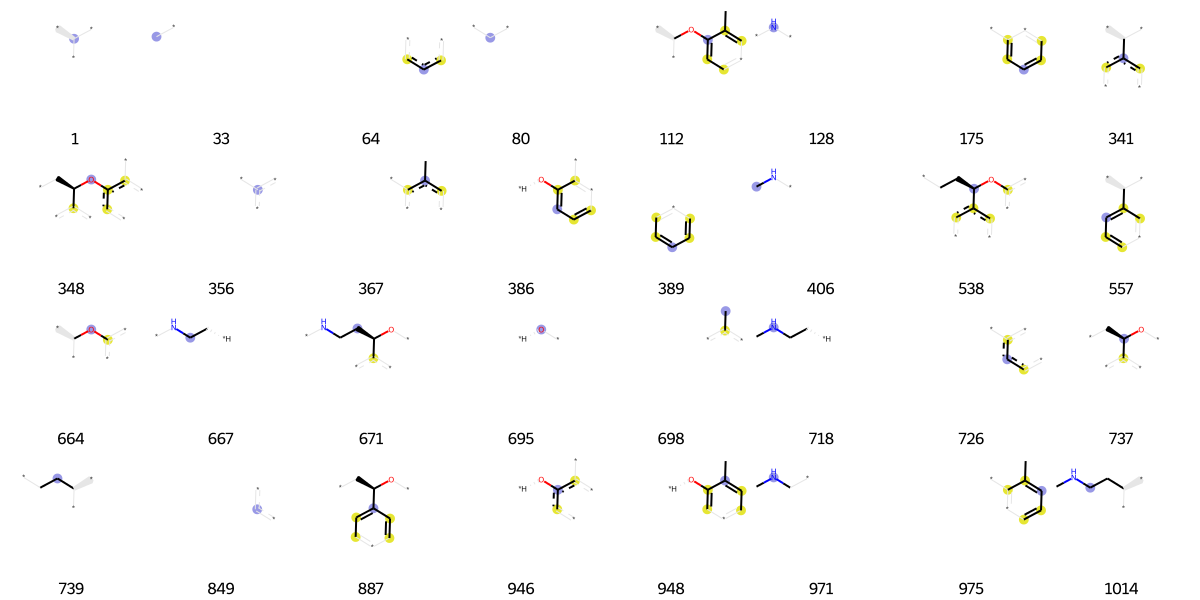

In [1079]:
prints = [(M48, x, bi) for x in fp48.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp48.GetOnBits ()])

In [1080]:
bi = {}

fp49= AllChem.GetMorganFingerprintAsBitVect(M49, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp49, fp_arr)
np.nonzero(fp_arr)
list(fp49.GetOnBits())

[3,
 15,
 33,
 36,
 49,
 118,
 138,
 212,
 233,
 250,
 268,
 280,
 289,
 301,
 356,
 381,
 387,
 408,
 453,
 455,
 498,
 519,
 561,
 578,
 622,
 636,
 713,
 714,
 726,
 745,
 786,
 807,
 823,
 849,
 875,
 926,
 927,
 999,
 1019]

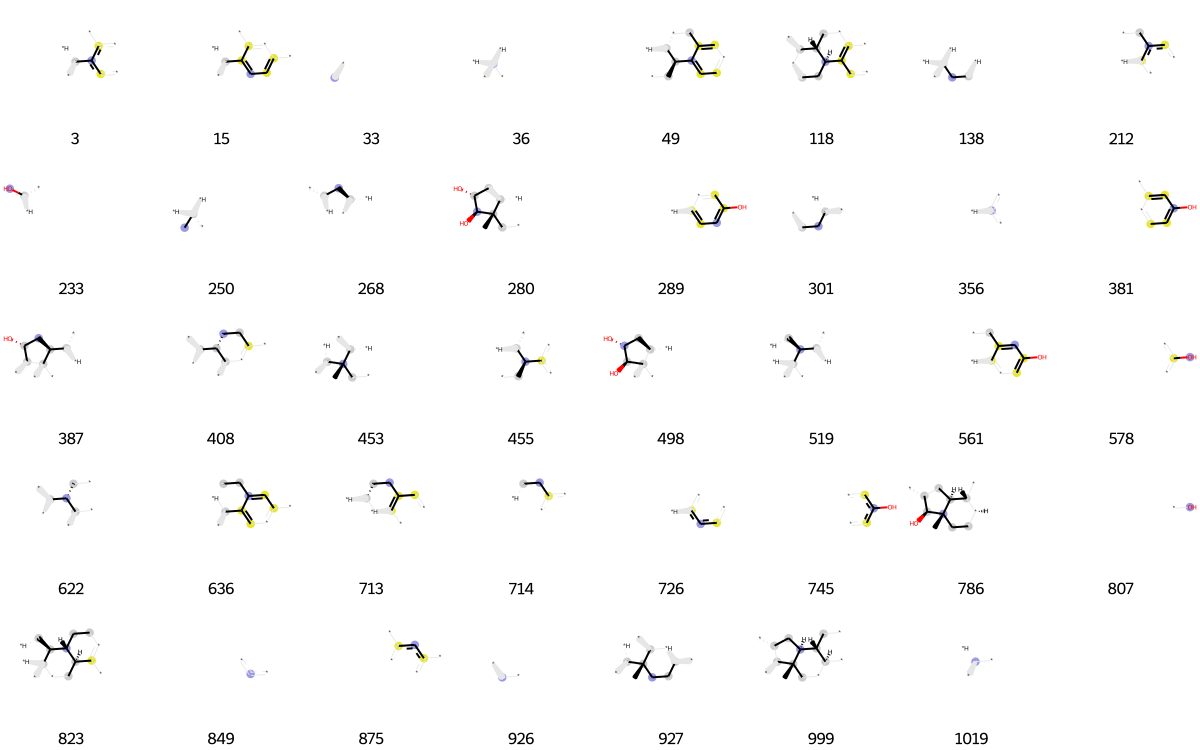

In [1081]:
prints = [(M49, x, bi) for x in fp49.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp49.GetOnBits ()])

In [1082]:
bi = {}

fp50= AllChem.GetMorganFingerprintAsBitVect(M50, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp50, fp_arr)
np.nonzero(fp_arr)
list(fp50.GetOnBits())

[1,
 23,
 28,
 33,
 64,
 117,
 122,
 128,
 151,
 175,
 198,
 200,
 201,
 237,
 261,
 283,
 306,
 314,
 331,
 356,
 378,
 381,
 389,
 407,
 417,
 423,
 456,
 464,
 523,
 527,
 559,
 569,
 603,
 650,
 653,
 656,
 668,
 672,
 690,
 698,
 726,
 788,
 799,
 807,
 831,
 849,
 875,
 882,
 893,
 923,
 926,
 935,
 945,
 950,
 967,
 1014]